<a href="https://colab.research.google.com/github/stephenbeckr/time-series-class/blob/main/Demos/TimeSeries_MultivariateDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multivariate time series
Demos adapted from Will Kleiber (2018) by Stephen Becker (2022)
1. Colorado temperature data: min/max and Boulder/Longmont
2. Synthetic data
3. LA cardiovascular mortality data (and temperature and particulate matter)

## Demo 1: temperature data

We'll have a bivariate time series (min and max temperatures), and start by looking at the correlation between min and max temperature in Boulder, CO

In [ ]:
install.packages("fields") # and ‘dotCall64’, ‘gridExtra’, ‘spam’, ‘viridis’, ‘maps’
library(fields)

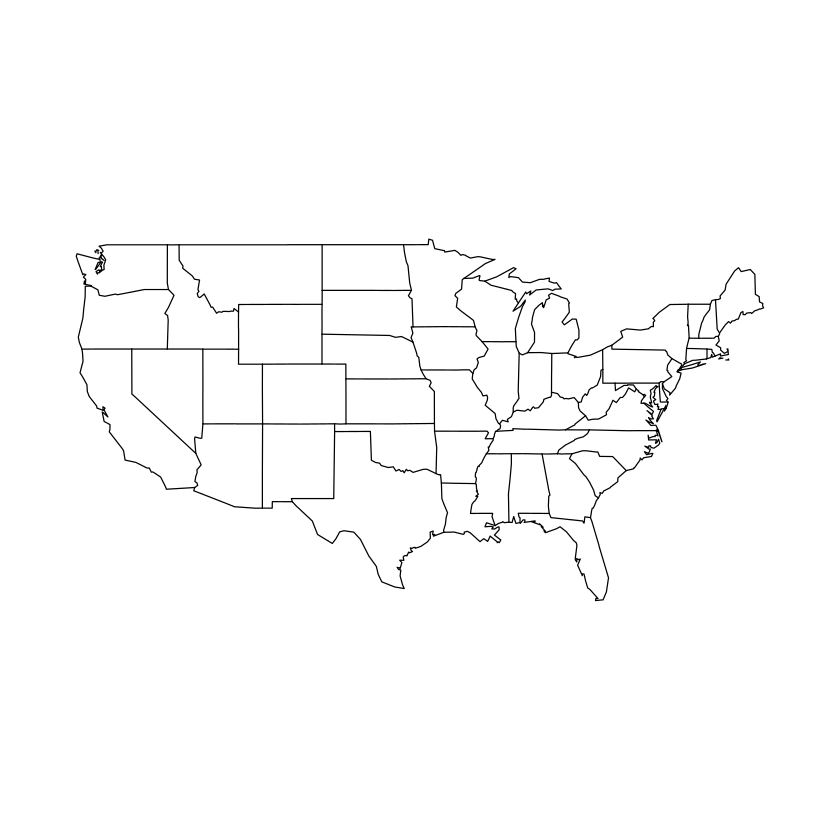

In [ ]:
# What does "fields" do? Lets us plot things, like...
US()

In [ ]:
# Data with all Colorado cities is large (50 MB)
# load(url("https://github.com/stephenbeckr/time-series-class/raw/main/Data/COBivariateTemp.RData"))

# so just get Boulder data
load(url("https://github.com/stephenbeckr/time-series-class/raw/main/Data/COBivariateTemp_Boulder.RData"))
ls()

[1] "lon.lat"     "np"          "nt"          "TNR_Boulder" "TXR_Boulder"

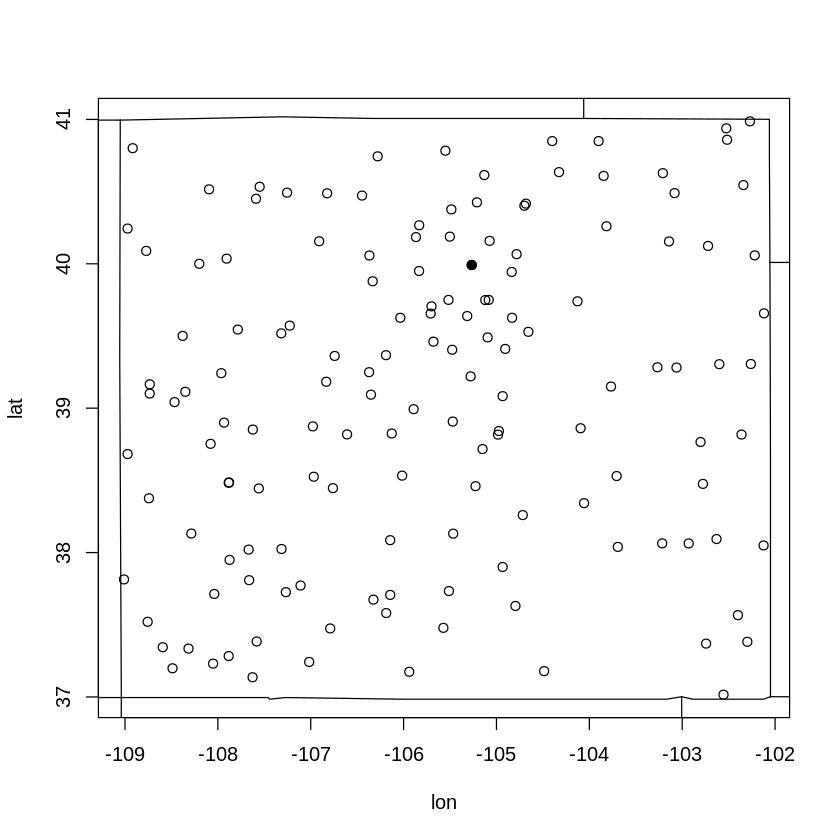

In [ ]:
plot(lon.lat) # lat/long pts in our dataset
US(add=TRUE)  # add US & States as a reference
points(rbind(lon.lat[c(10),]),pch=19) # highlight Boulder, CO

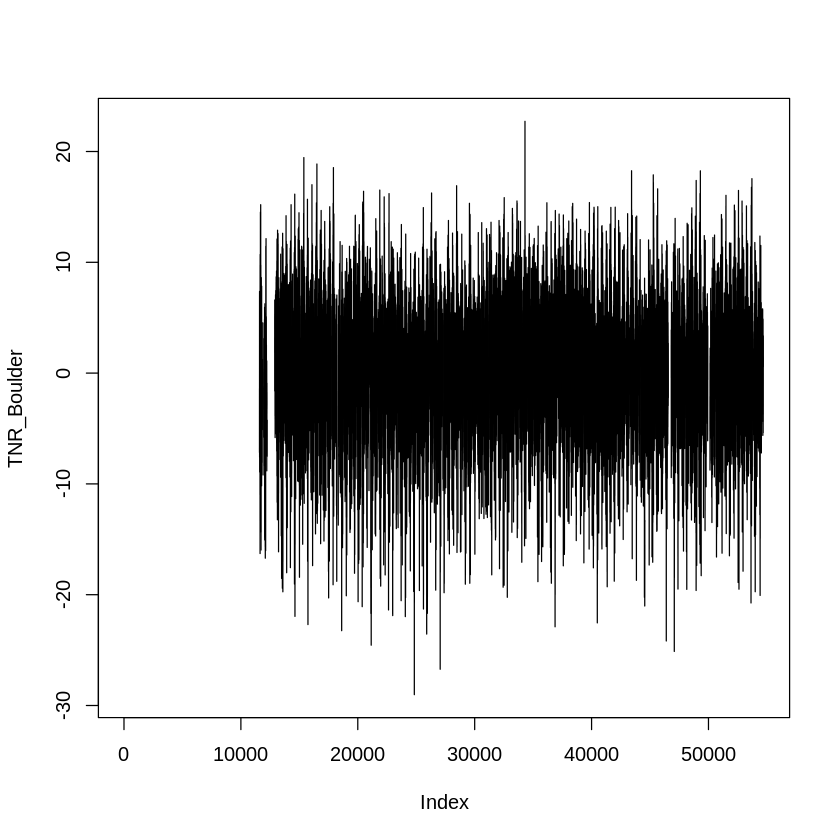

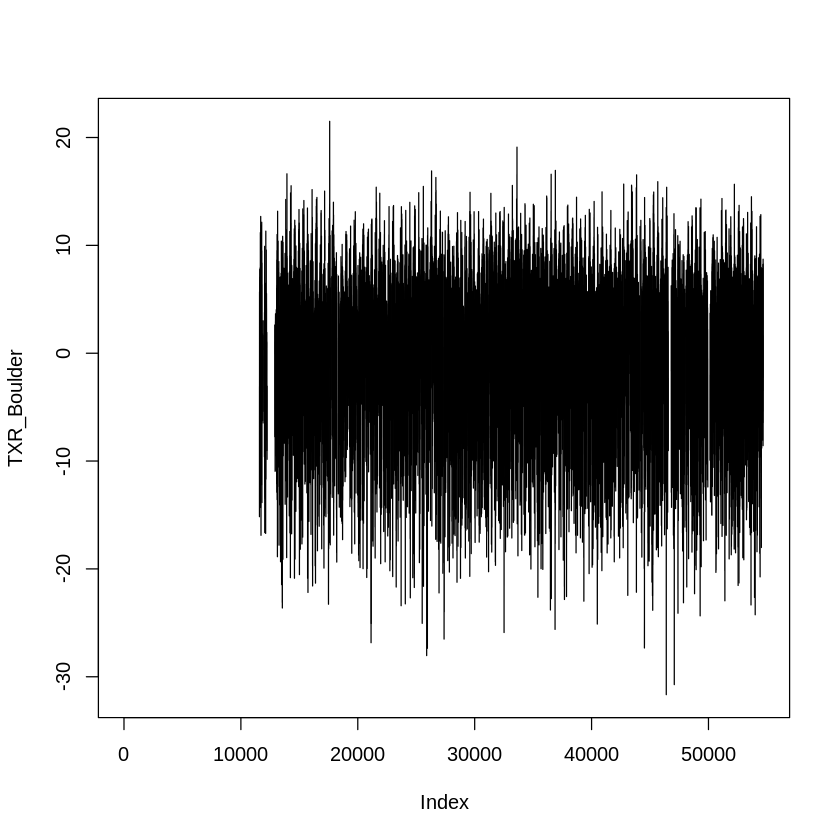

In [ ]:
plot(TNR_Boulder,type="l")
plot(TXR_Boulder,type="l")

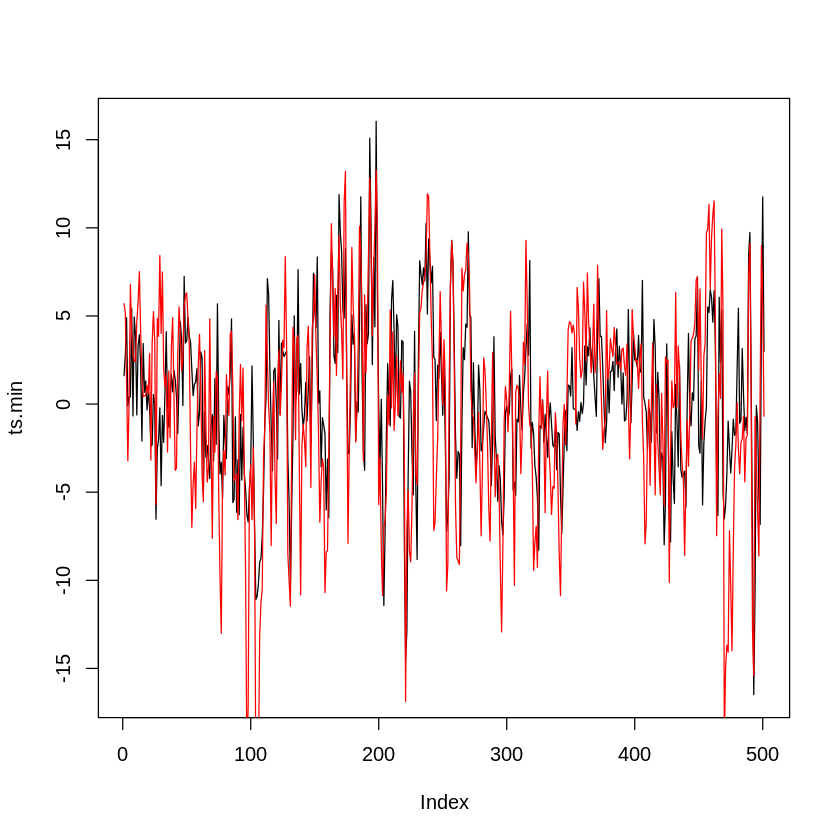

In [ ]:
ts.min <- TNR_Boulder[51300:51800] # July 19 to Dec 1 the following year
ts.max <- TXR_Boulder[51300:51800]

plot(ts.min,type="l")
lines(ts.max,type="l",col="red")

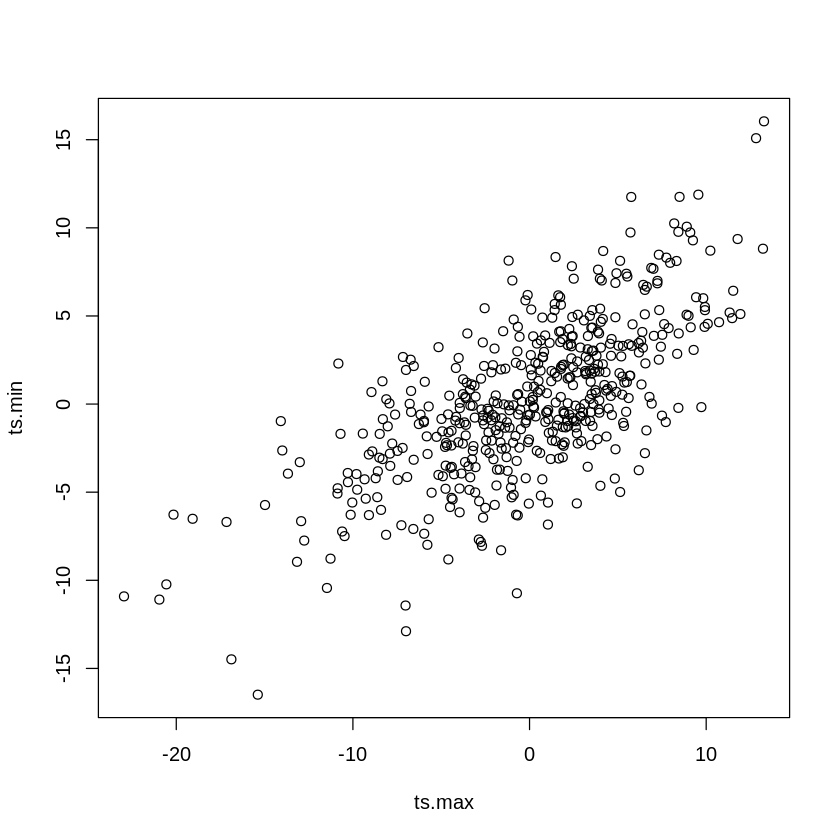

In [ ]:
plot(ts.min~ts.max)

Look at the correlations... at the current time, but also with lags
- min/max on the same day are highly correlated (duh)
- min temp today and max temp tomorrow are fairly well correlated...
- but max temp today and min temp tomorrow are even higher correlated!

In [ ]:
cor(ts.min,ts.max)
cor(ts.min[1:500],ts.max[2:501])
cor(ts.min[2:501],ts.max[1:500])

[1] 0.6841647

[1] 0.4425719

[1] 0.6875844

### Demo 1b: let's load another city
We can look at min vs max temp correlation, or correlation between two cities

In [ ]:
load(url("https://github.com/stephenbeckr/time-series-class/raw/main/Data/COBivariateTemp.RData"))

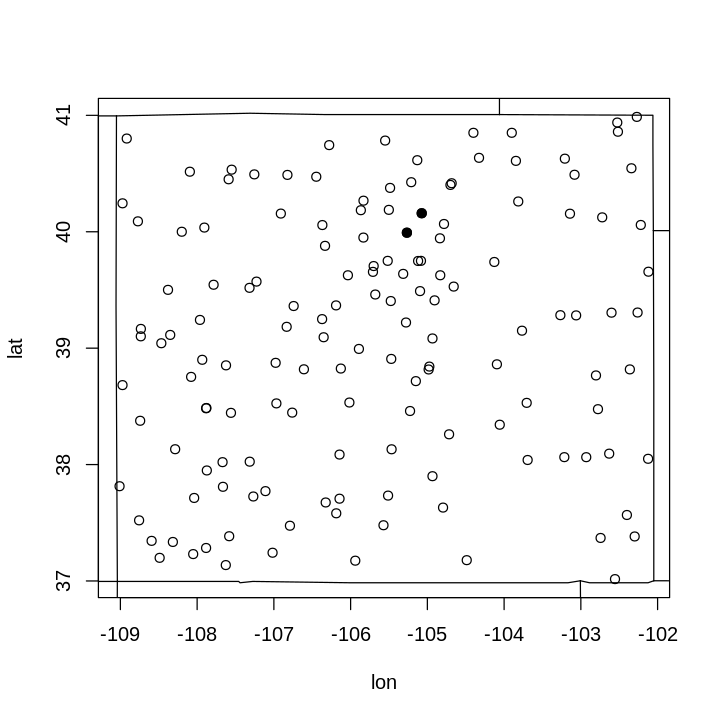

In [41]:
options(repr.plot.width = 6, repr.plot.height=6)
plot(lon.lat)
US(add=TRUE)
BLDR <- 10  # Boulder, CO
LONG <- 85  # Longmont, CO
points(lon.lat[c(BLDR,LONG),],pch=19)

Let's look at the correlation between min and max temp in Boulder

Recall, `TN` stand for **miN** temperature, and `TX` stands for **maX** temperature

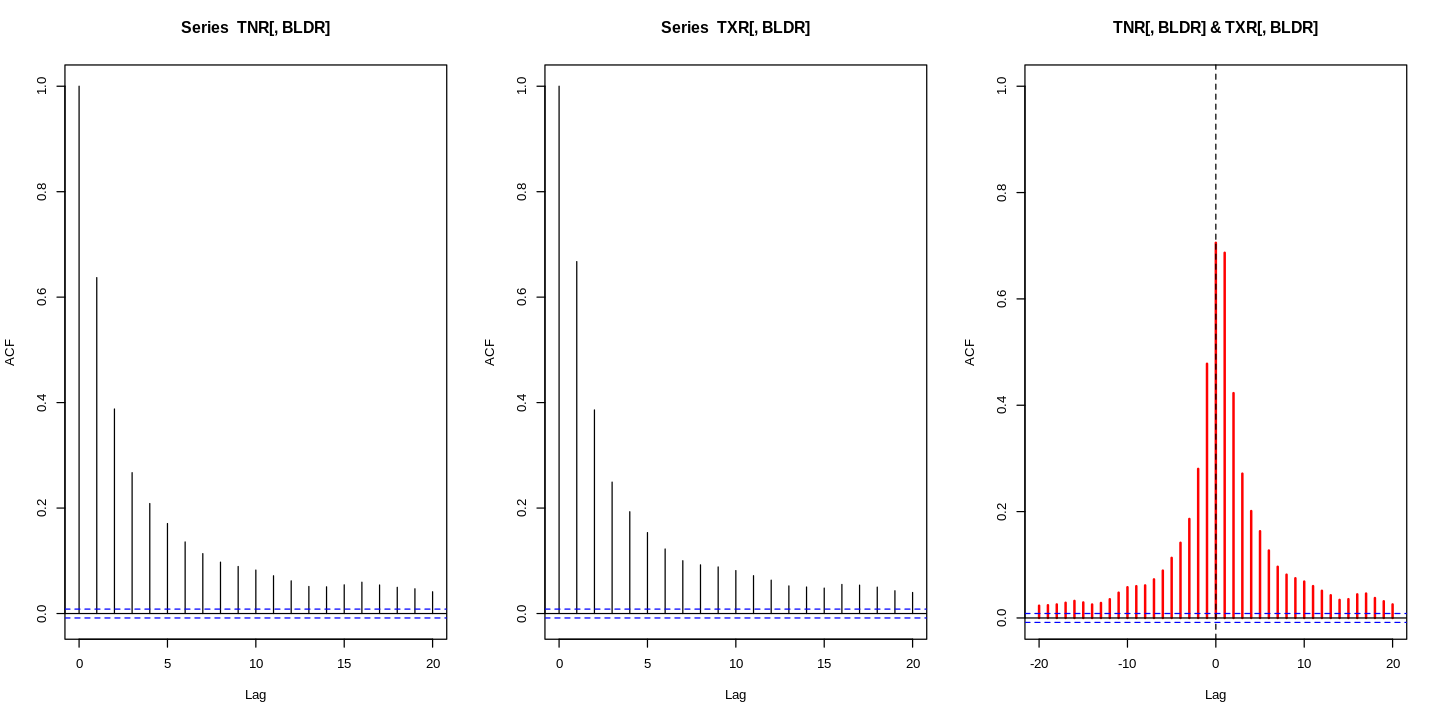

In [42]:
options(repr.plot.width = 12, repr.plot.height=6)
par(mfrow=c(1,3))
acf(TNR[,BLDR],na.action=na.pass,lag.max=20)
acf(TXR[,BLDR],na.action=na.pass,lag.max=20)
ccf(TNR[,BLDR],TXR[,BLDR],na.action=na.pass,lag.max=20,col="red",lwd=2,ylim=c(0,1))
abline(v=0,lty=2)

And now look at correlation (in *min* daily temperature) between Boulder and Longmont

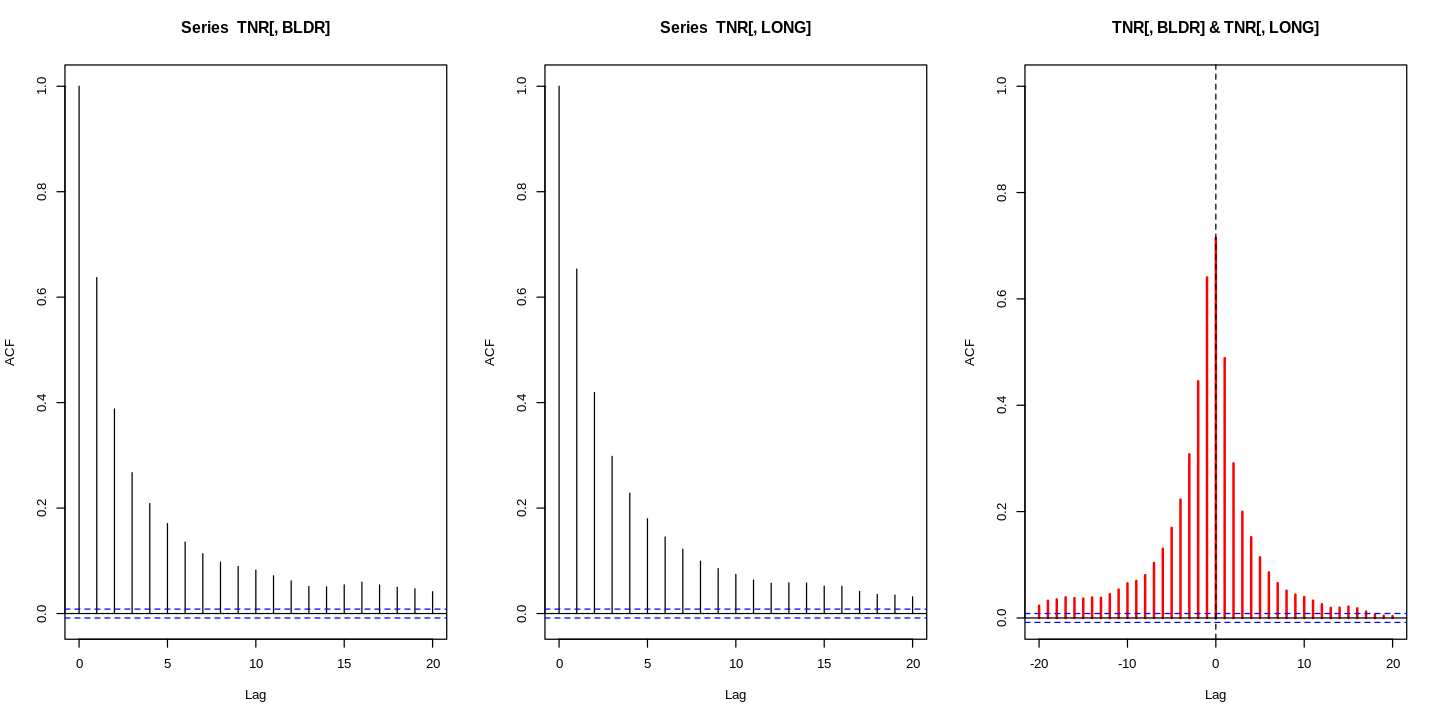

In [43]:
par(mfrow=c(1,3))
acf(TNR[,BLDR],na.action=na.pass,lag.max=20)
acf(TNR[,LONG],na.action=na.pass,lag.max=20)
ccf(TNR[,BLDR],TNR[,LONG],na.action=na.pass,lag.max=20,col="red",lwd=2,ylim=c(0,1))
abline(v=0,lty=2)

In [47]:
TNR[,LONG] # Longmont is missing more observations than Boulder

[1]            NA            NA            NA            NA            NA
    [6]            NA            NA            NA            NA            NA
   [11]            NA            NA            NA            NA            NA
   [16]            NA            NA            NA            NA            NA
   [21]            NA            NA            NA            NA            NA
   [26]            NA            NA            NA            NA            NA
   [31]            NA            NA            NA            NA            NA
   [36]            NA            NA            NA            NA            NA
   [41]            NA            NA            NA            NA            NA
   [46]            NA            NA            NA            NA            NA
   [51]            NA            NA            NA            NA            NA
   [56]            NA            NA            NA            NA            NA
   [61]            NA            NA            NA            NA            NA
   [66]            NA            NA            NA            NA            NA
   [71]            NA            NA            NA            NA            NA
   [76]            NA            NA            NA            NA            NA
   [81]            NA            NA            NA            NA            NA
   [86]            NA            NA            NA            NA            NA
   [91]            NA            NA            NA            NA            NA
   [96]            NA            NA            NA            NA            NA
  [101]            NA            NA            NA            NA            NA
  [106]            NA            NA            NA            NA            NA
  [111]            NA            NA            NA            NA            NA
  [116]            NA            NA            NA            NA            NA
  [121]            NA            NA            NA            NA            NA
  [126]            NA            NA            NA            NA            NA
  [131]            NA            NA            NA            NA            NA
  [136]            NA            NA            NA            NA            NA
  [141]            NA            NA            NA            NA            NA
  [146]            NA            NA            NA            NA            NA
  [151]            NA            NA            NA            NA            NA
  [156]            NA            NA            NA            NA            NA
  [161]            NA            NA            NA            NA            NA
  [166]            NA            NA            NA            NA            NA
  [171]            NA            NA            NA            NA            NA
  [176]            NA            NA            NA            NA            NA
  [181]            NA            NA            NA            NA            NA
  [186]            NA            NA            NA            NA            NA
  [191]            NA            NA            NA            NA            NA
  [196]            NA            NA            NA            NA            NA
  [201]            NA            NA            NA            NA            NA
  [206]            NA            NA            NA            NA            NA
  [211]            NA            NA            NA            NA            NA
  [216]            NA            NA            NA            NA            NA
  [221]            NA            NA            NA            NA            NA
  [226]            NA            NA            NA            NA            NA
  [231]            NA            NA            NA            NA            NA
  [236]            NA            NA            NA            NA            NA
  [241]            NA            NA            NA            NA            NA
  [246]            NA            NA            NA            NA            NA
  [251]            NA            NA            NA            NA            NA
  [256]            NA     

In [45]:
cor( TNR[,BLDR], TNR[,LONG] )

[1] NA

In [54]:
cor( TNR[,BLDR], TNR[,LONG] , use="complete.obs") # or "pairwise.complete.obs")

[1] 0.7205168

In [58]:
N <- length(TNR[,BLDR])
cor( TNR[-1,BLDR], TNR[-N,LONG] , use="complete.obs") # Boulder at t+1 vs Longmont at t

[1] 0.4920563

In [59]:
cor( TNR[-N,BLDR], TNR[-1,LONG] , use="complete.obs") # Boulder at t vs Longmont at t+1

[1] 0.6454713

There's a stronger correlation between Boulder's temperature today and Longmont's temperature tomorrow, compared to vice versa

Does that make sense?

Weather in Colorado generally moves in from the West, and Boulder is west of Longmont (but only by about 10 miles, so it seems unlikely this would be an effect)

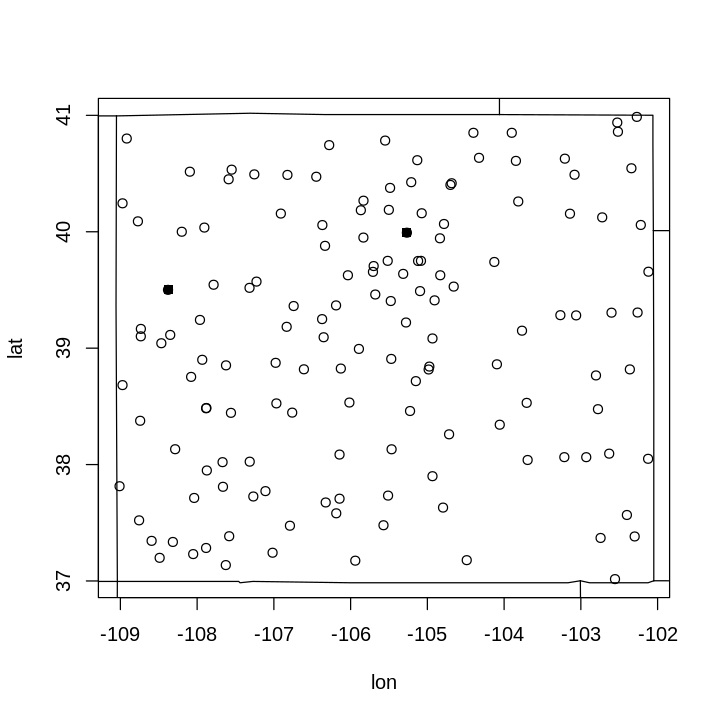

In [87]:
options(repr.plot.width = 6, repr.plot.height=6)
plot(lon.lat)
US(add=TRUE)
TOWN <- 3   # something on the Western Slope of Colorado
# TOWN <- 9   # far East in Colorado
points(lon.lat[c(BLDR,TOWN),],pch=15)

In [88]:
cor( TNR[,BLDR], TNR[,TOWN] , use="complete.obs") # or "pairwise.complete.obs")

N <- length(TNR[,BLDR])
cor( TNR[-1,BLDR], TNR[-N,TOWN] , use="complete.obs") # Boulder at t+1 vs Town at t
cor( TNR[-N,BLDR], TNR[-1,TOWN] , use="complete.obs") # Boulder at t vs Town at t+1

# A different trend! But make sure we have enough data

[1] 0.4689798

[1] 0.2531583

[1] 0.4318288

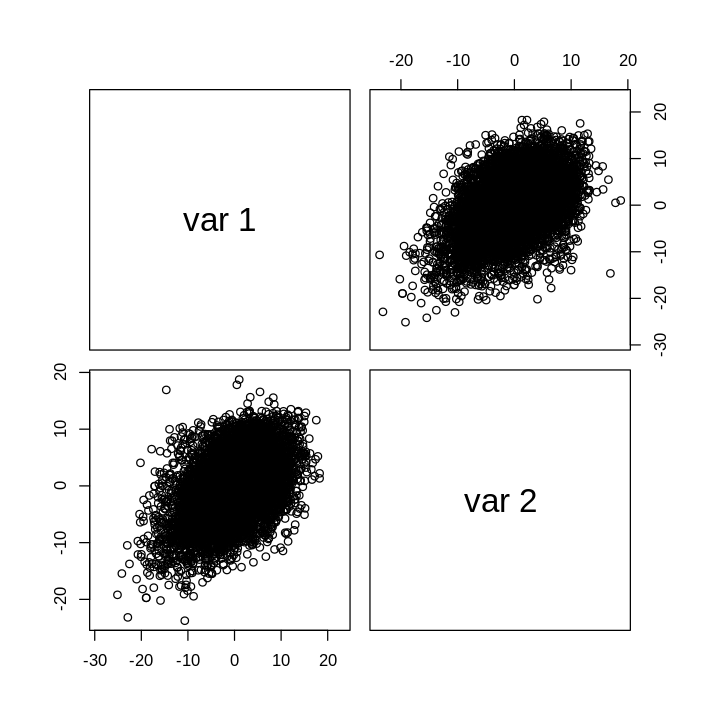

In [89]:
pairs( cbind(TNR[,BLDR], TNR[,TOWN]) )

Can you explain the asymmetry?  (that's not a rhetorical question... I don't know the underlying reason behind the asymmetry)

for Town 9, it makes sense. For Town 3, which is West of Colorado, it doesn't.

## Demo 2: synthetic data

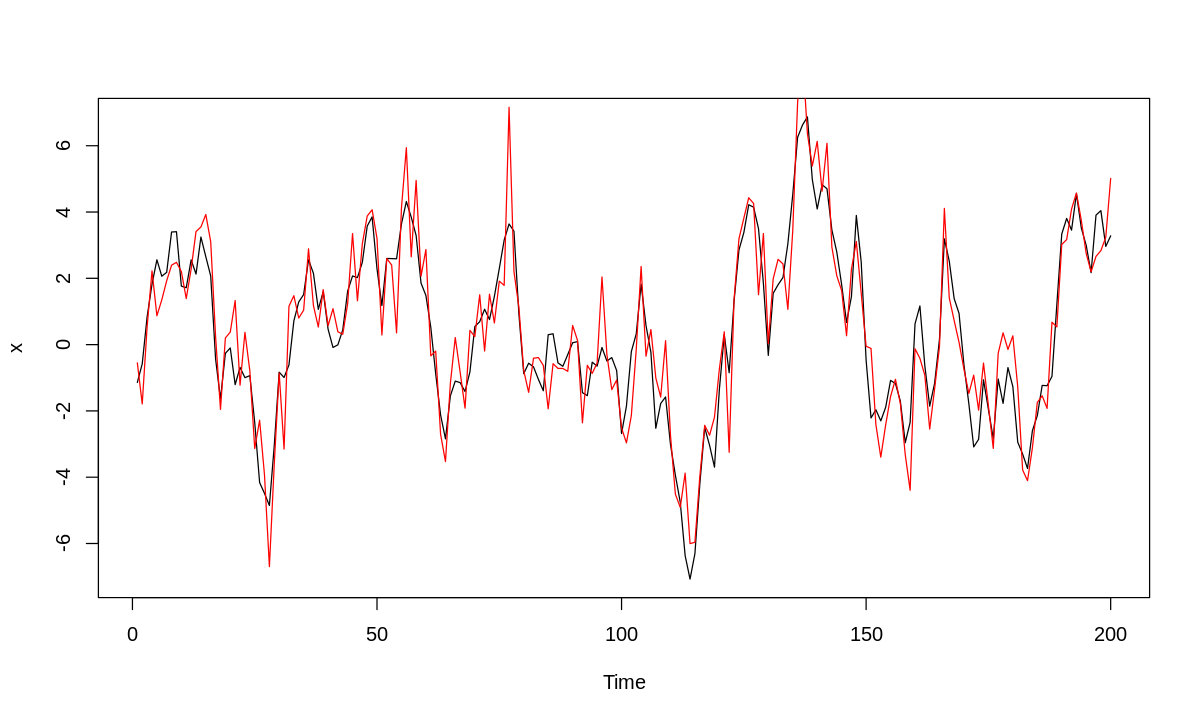

In [1]:
set.seed(3)
n <- 200
x <- arima.sim(n=n,list(ar=0.8,ma=0.5))
y <- x + rnorm(n)  # y is a noisy version of x (*not* lagged)

options(repr.plot.width = 10, repr.plot.height=6)
plot(x,type="l")
lines(y,col="red")

Let's look at the ACF for $X$ and $Y$, and then the cross-correlation function (CCF) for $X$ and $Y$

Be careful, the CCF isn't symmetric!

Question: if the CCF(x,y) isn't the same as the CCF(y,x), why don't we plot CCF(y,x)?

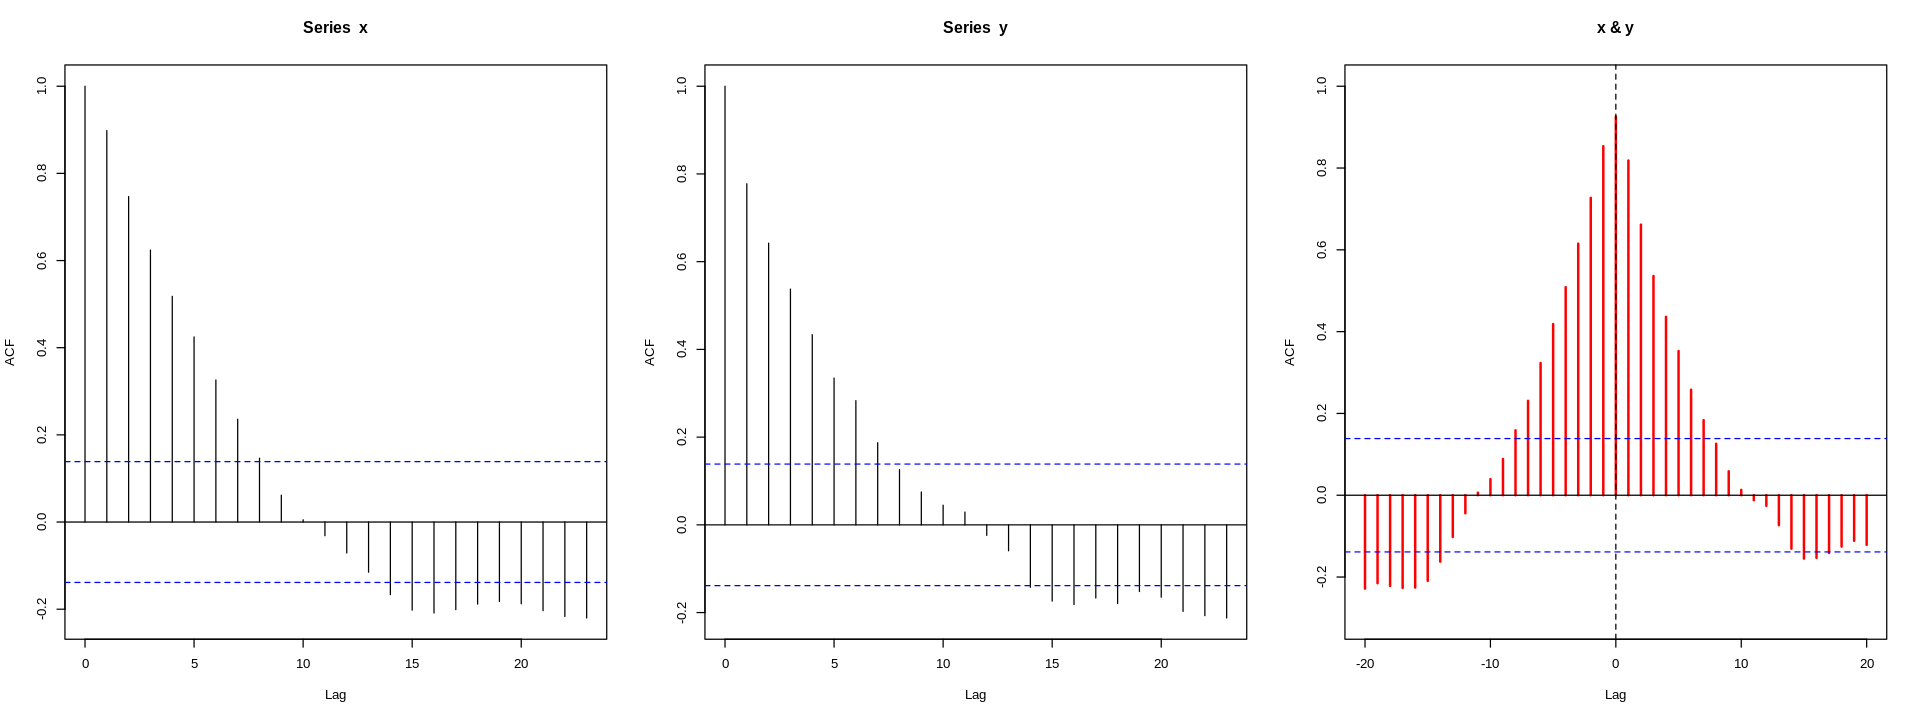

In [2]:
par(mfrow=c(1,3))
options(repr.plot.width = 16, repr.plot.height=6)
acf(x)
acf(y)
ccf(x,y,col="red",lwd=2,ylim=c(-0.3,1));abline(v=0,lty=2)

Now let's make $Y$ a lagged version of $X$

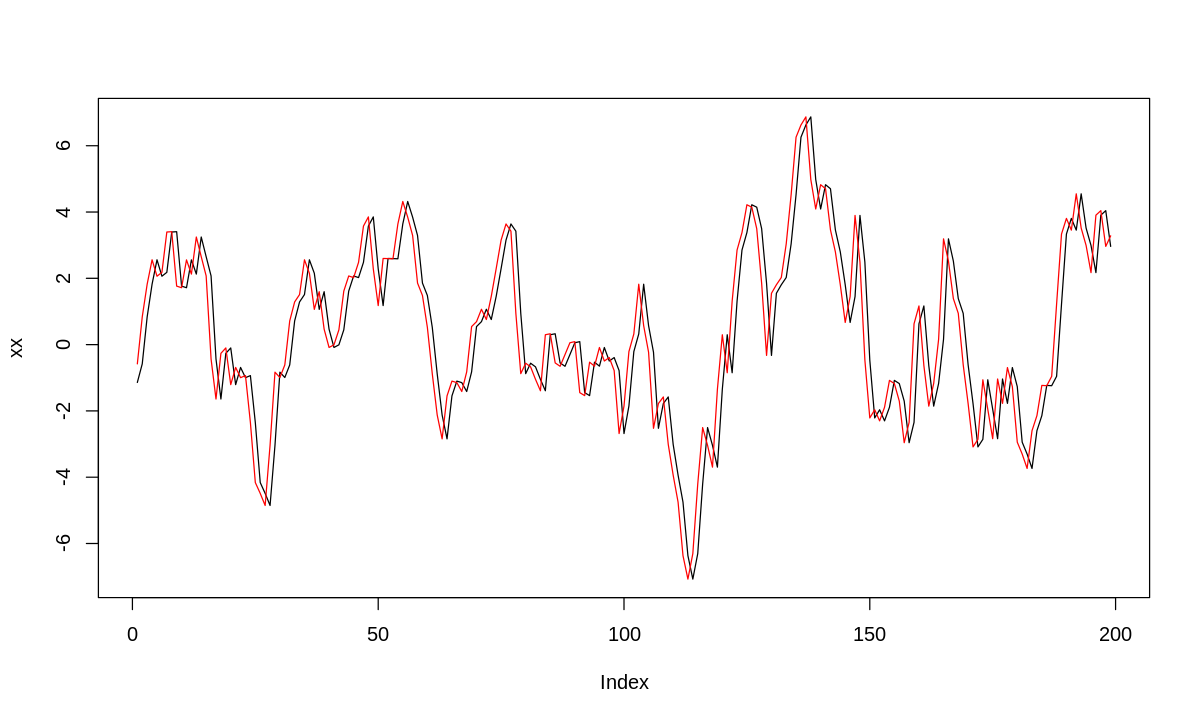

In [3]:
y <- x[2:n] # Y(t) = X(t+1)
xx <- x[-n] # exclude last value

options(repr.plot.width = 10, repr.plot.height=6)
plot(xx,type="l")
lines(y,col="red")

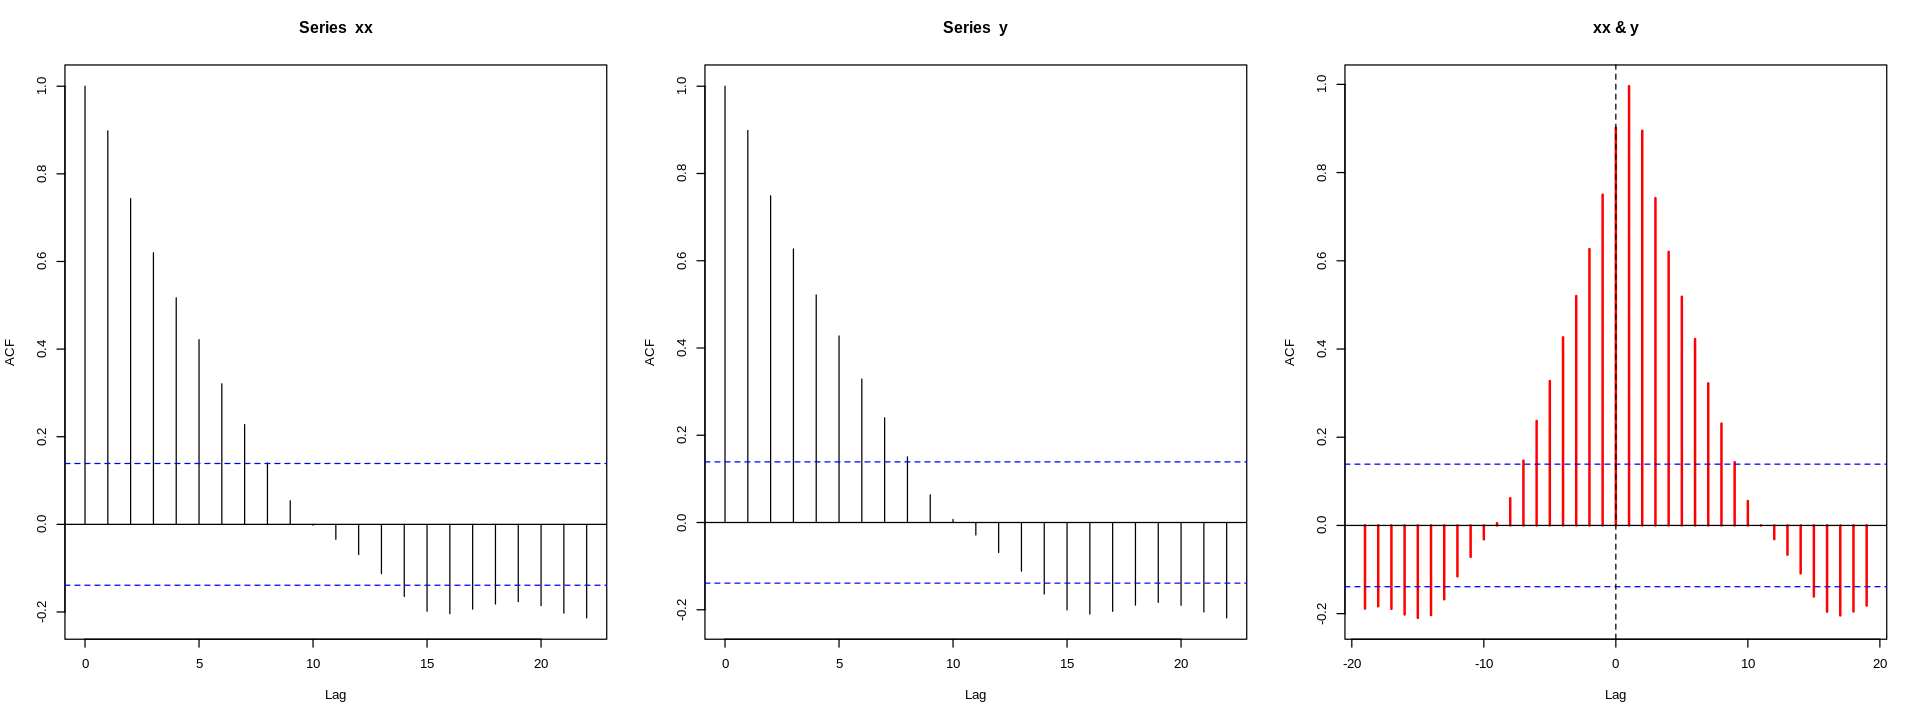

In [4]:
par(mfrow=c(1,3))
options(repr.plot.width = 16, repr.plot.height=6)
acf(xx)
acf(y)
ccf(xx,y,col="red",lwd=2);abline(v=0,lty=2)

In [7]:
# Remember, the cross-correlation(covariance) function does 
# not have to be symmetric about 0:
cor(x[2:n],y[1:(n-1)]) # Cor( X(t+1), Y(t) )
cor(x[1:(n-1)],y[2:n]) # Cor( X(t-1), Y(t) )

[1] 1

[1] NA

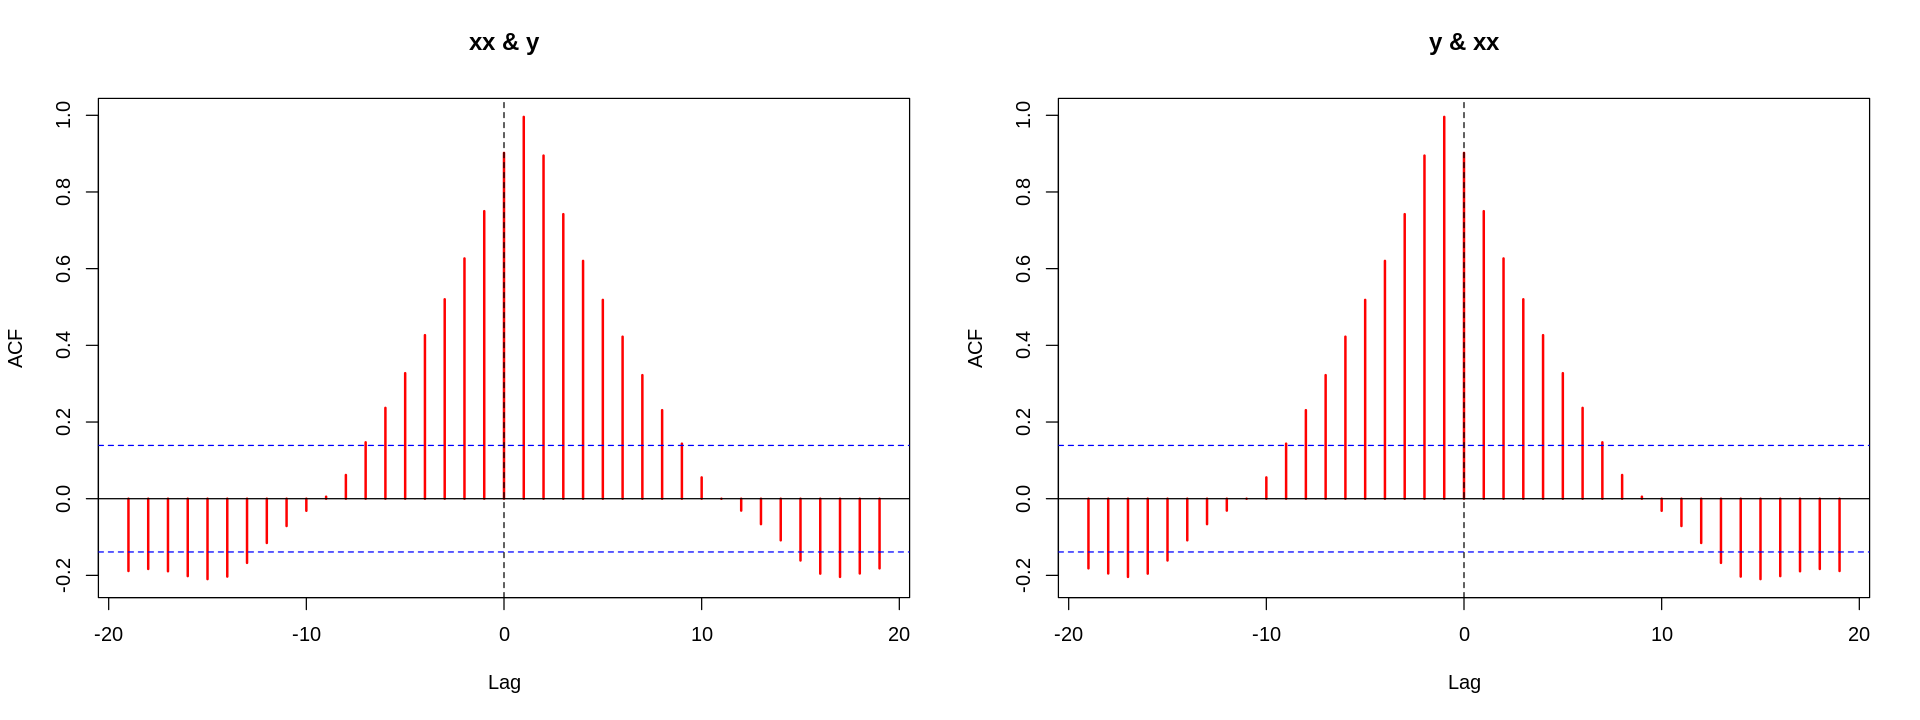

In [8]:
par(mfrow=c(1,2))
ccf(xx,y,col="red",lwd=2);abline(v=0,lty=2)
ccf(y,xx,col="red",lwd=2);abline(v=0,lty=2)

The correlation of $X$ and $Y$ at lags other than 1 is *really* from autocorrelation of $X$ itself. Let's make $X_t$ a WN process and repeat what we did above

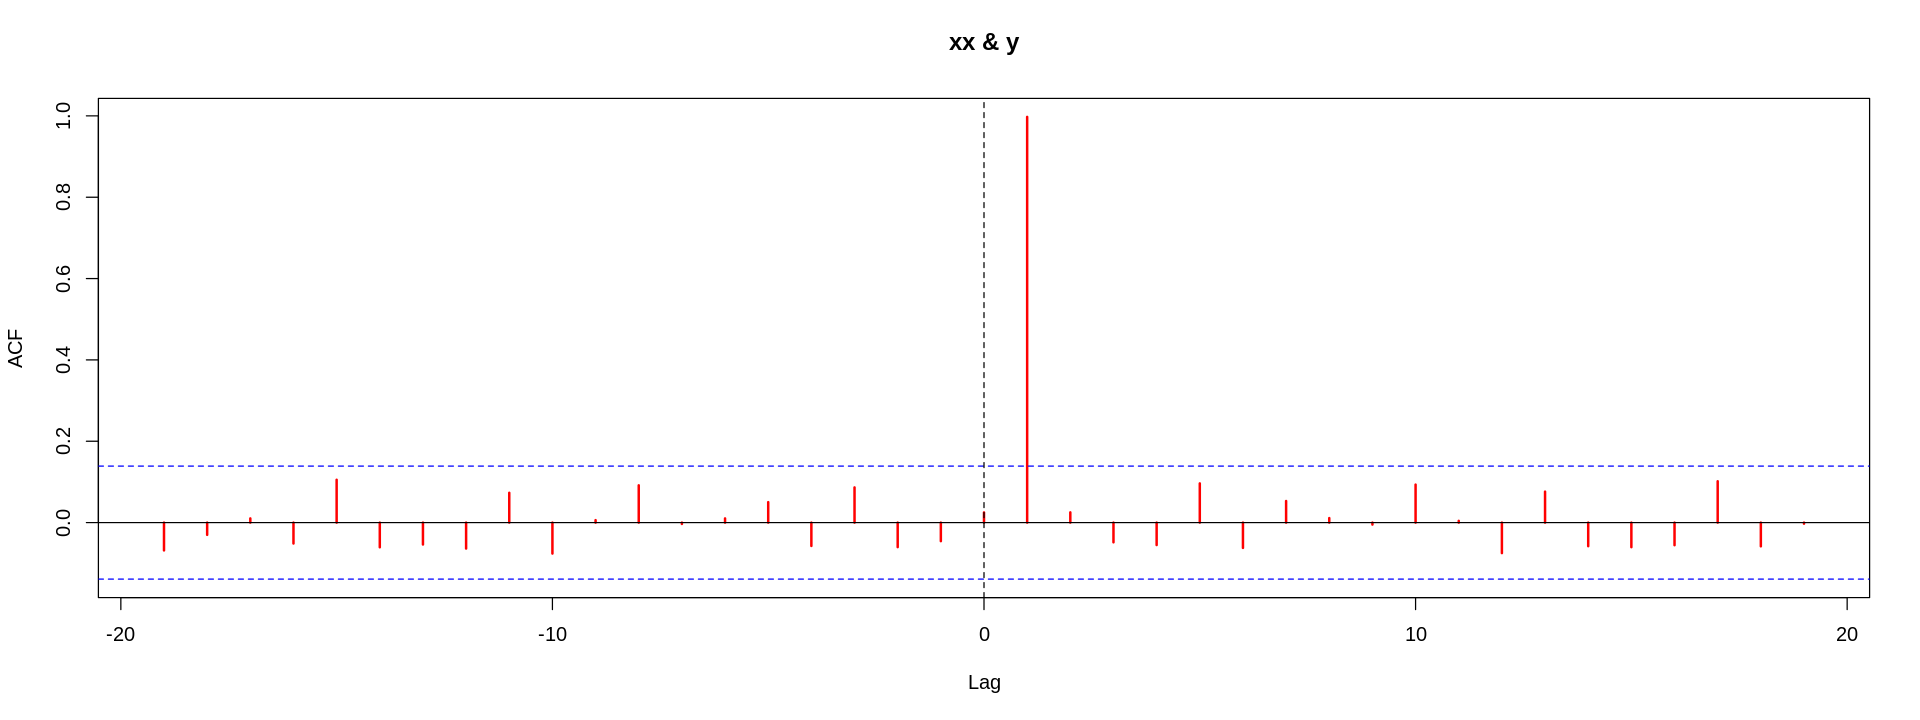

In [9]:
x <- rnorm(n) # in particular, X_t is now a WN(0,1)

y <- x[2:n] # Y(t) = X(t+1)
xx <- x[-n] # exclude last value

ccf(xx,y,col="red",lwd=2);abline(v=0,lty=2)

## Demo 3: LA mortality, weather and pollution

We'll use the well-known LA mortality data, conveniently provided in the [ASTSA package](https://github.com/nickpoison/astsa/).  `astsa` is the R package to accompany the  [Springer](http://www.springer.com/us/book/9783319524511) text, [Time Series Analysis and Its Applications: With R Examples](http://www.stat.pitt.edu/stoffer/tsa4/)  and the [Chapman & Hall](https://www.routledge.com/Time-Series-A-Data-Analysis-Approach-Using-R/Shumway-Stoffer/p/book/9780367221096) text  [Time Series: A Data Analysis Approach using R](http://www.stat.pitt.edu/stoffer/tsda/) (both books by Stoffer).

The variables:
- `cmort`: 
These data are the average weekly cardiovascular mortality in Los Angeles County; 508 six-day smoothed averages obtained by filtering daily values over the 10 year period 1970-1979.
- `tempr` corresponding temperature for the same date range
- `part` corresponding particulate levels (smog) in the same date range

Is cardiovascular mortality correlated with smog and temperature? (and is smog correlated with temperature?)

We'll also use the [`vars`](https://cran.r-project.org/web/packages/vars/index.html) package (for VAR modeling, i.e., Vector AR models). It does "Estimation, lag selection, diagnostic testing, forecasting, causality analysis, forecast error variance decomposition and impulse response functions of VAR models and estimation of SVAR and SVEC models."

`vars` depends on `zoo` which is a package that gives a fancier version of the `ts` class that can handle irregularly spaced data



In [ ]:
install.packages("astsa")
library(astsa)

install.packages("vars") # depends on zoo, lmtest, etc.
library(vars)

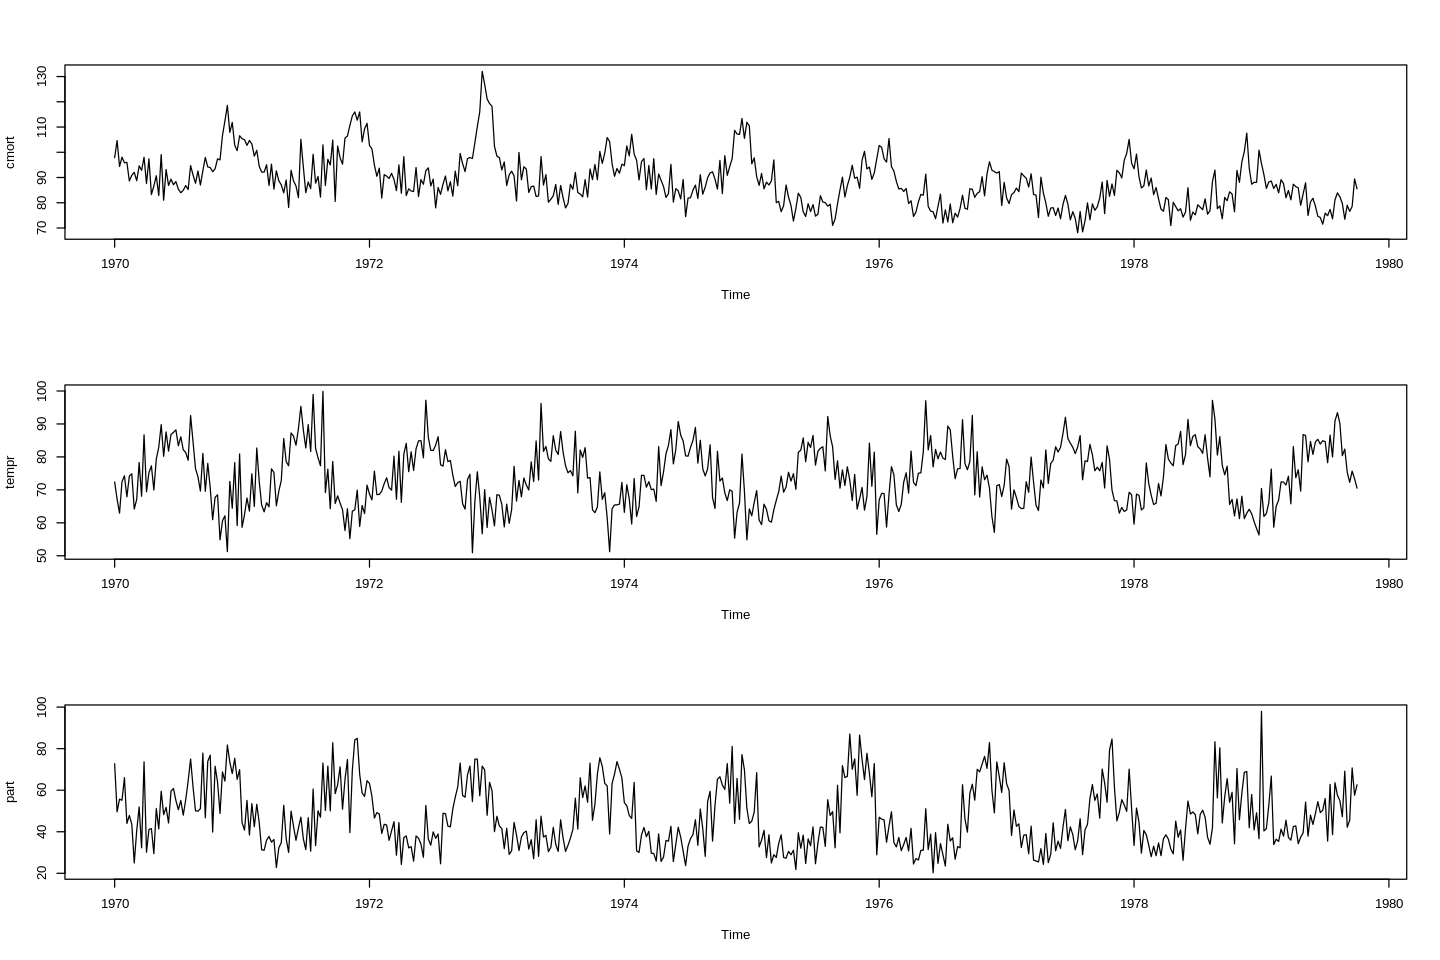

In [15]:
par(mfrow=c(3,1))
options(repr.plot.width = 12, repr.plot.height=8)
plot(cmort)
plot(tempr)
plot(part)

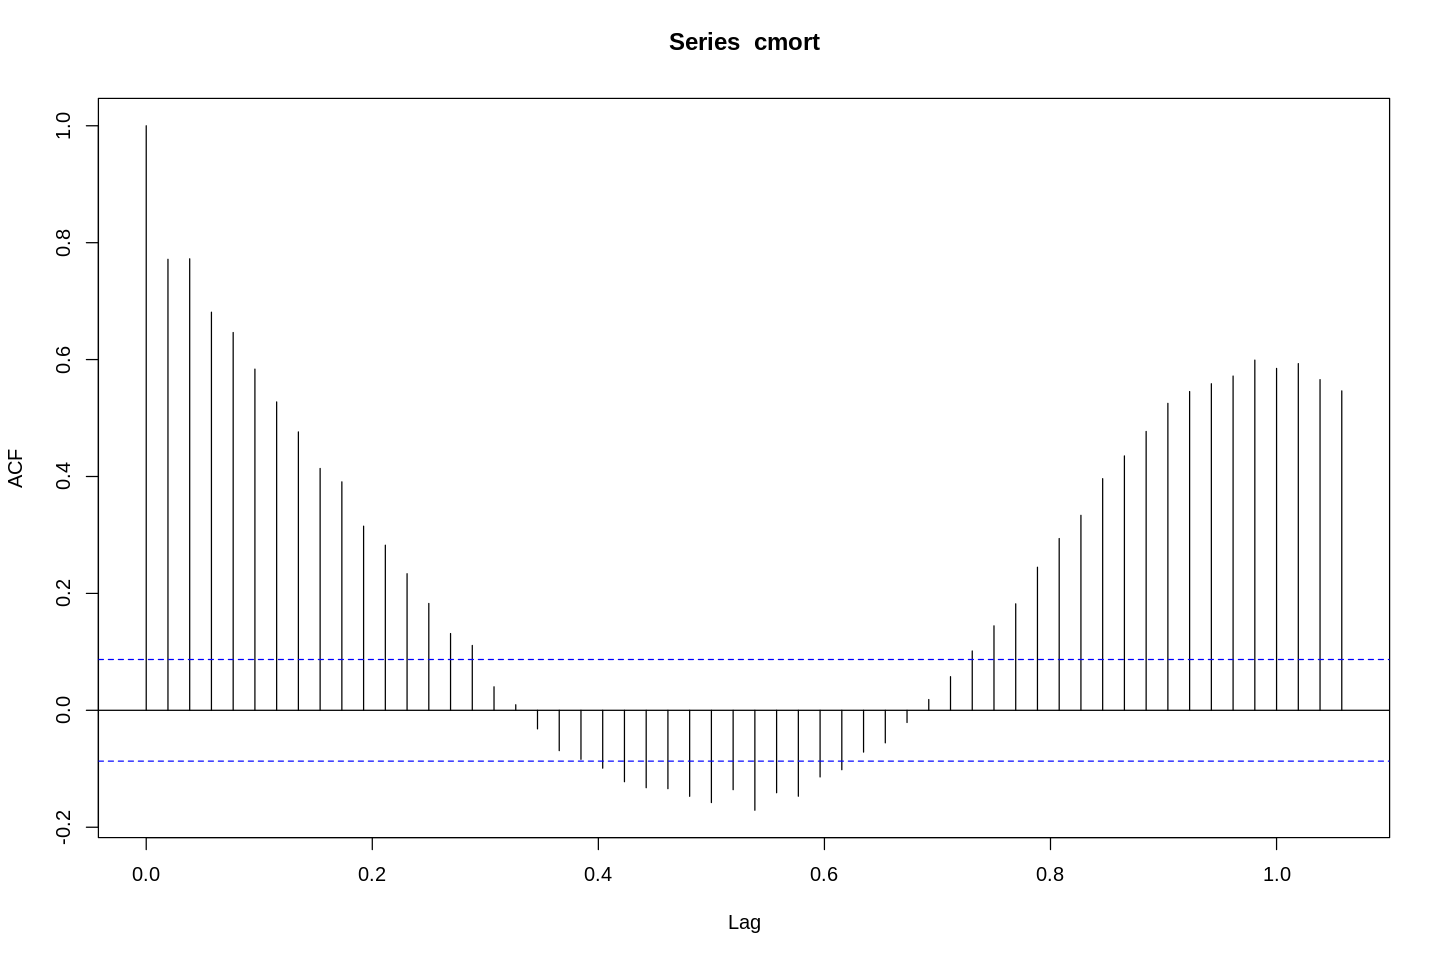

In [18]:
acf(cmort, lag.max = 55) # this is weekly data, so at least lag.max > 52

#### Detrend
Before we look for correlations, we should detrend.  (Why? Because the time series may have similar trends, i.e., hidden variables, and this will dominate any hunt for correlations)

In [16]:
times <- 1:length(cmort)

# One way to detrend: regress on a linear model + sinusoids of yearly and half yearly period
# Other ways: you could make indicator variables for each week (we probably have enough data for this)
#   and to get fancy, when you do that, you could do it via multiple regression (i.e., using
#   all three time series at the same time)
cmort.r <- as.ts(lm(cmort~times+cos(2*pi*times/52)+sin(2*pi*times/52)+cos(2*2*pi*times/52)+
  sin(2*2*pi*times/52))$resid)
tempr.r <- as.ts(lm(tempr~times+cos(2*pi*times/52)+sin(2*pi*times/52)+cos(2*2*pi*times/52)+
  sin(2*2*pi*times/52))$resid)
part.r <- as.ts(lm(part~times+cos(2*pi*times/52)+sin(2*pi*times/52)+cos(2*2*pi*times/52)+
  sin(2*2*pi*times/52))$resid)

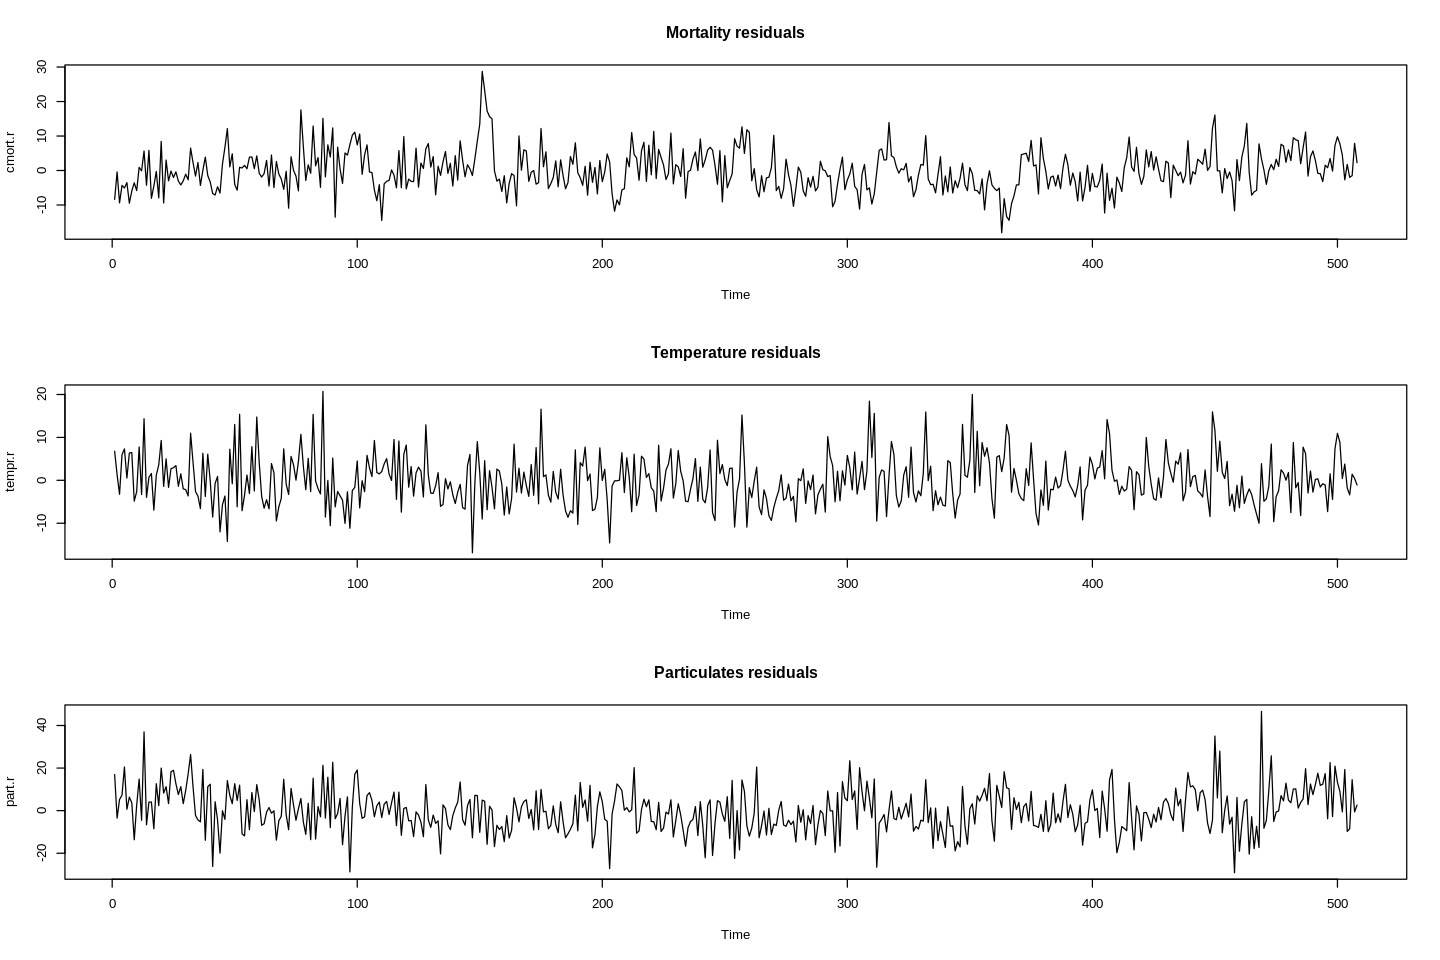

In [17]:
## Exploratory plots of residuals

par(mfrow=c(3,1))
options(repr.plot.width = 12, repr.plot.height=8)

plot(cmort.r,main="Mortality residuals")
plot(tempr.r,main="Temperature residuals")
plot(part.r,main="Particulates residuals")

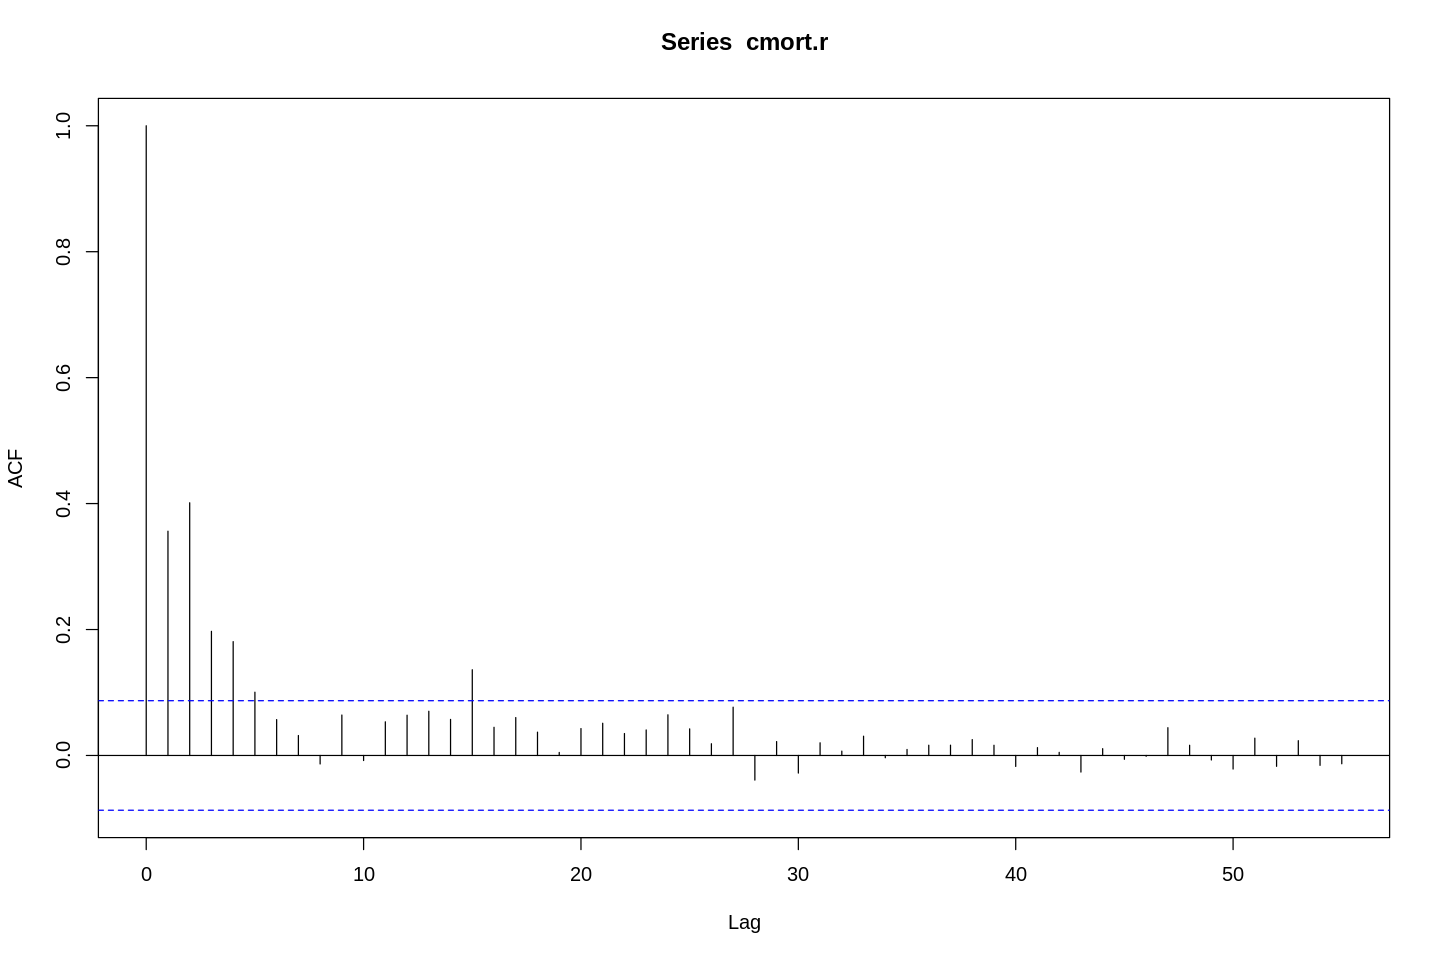

In [19]:
# Did we at least remove the big annual trends?
acf(cmort.r, lag.max = 55) # this is weekly data, so at least lag.max > 52

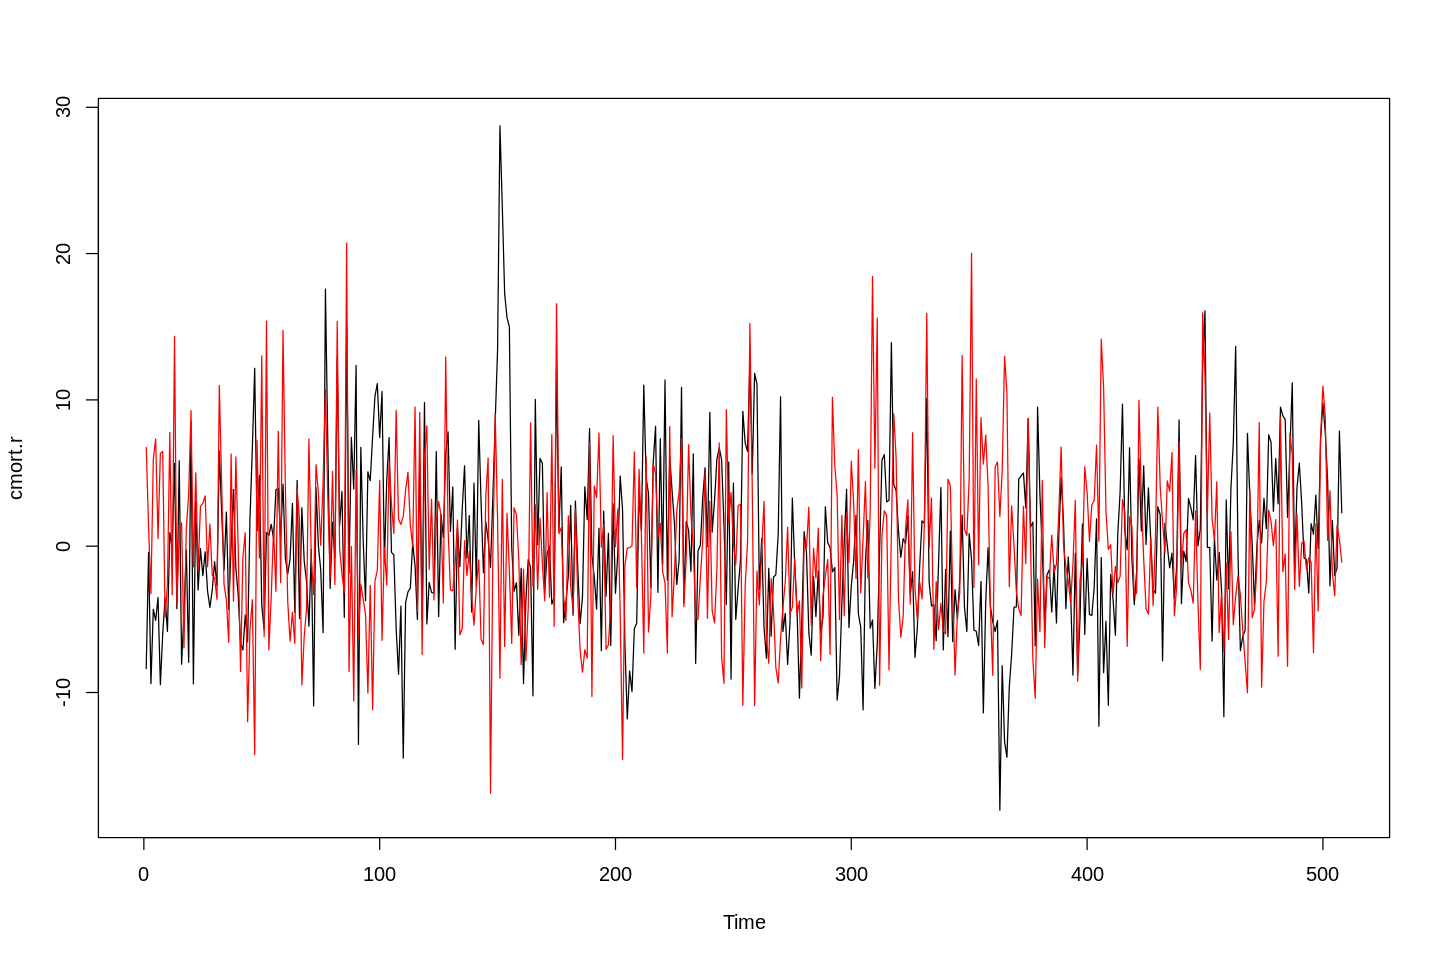

In [20]:
## Mortality and temperature
plot(cmort.r,ylim=range(cmort.r,tempr.r))
lines(tempr.r,col="red")

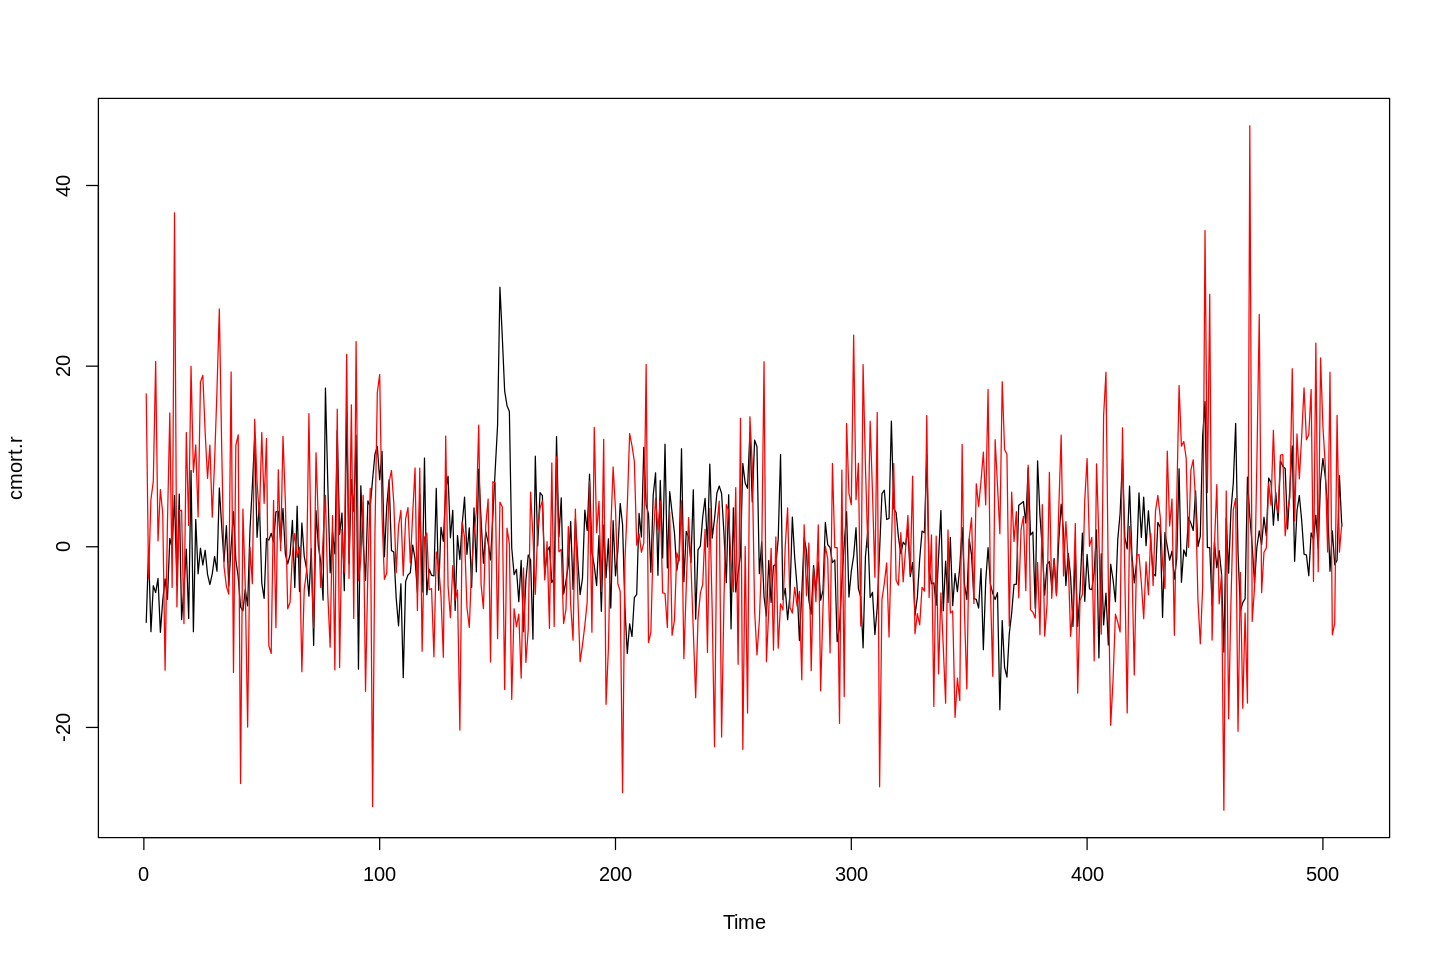

In [21]:
## Mortality and particulates
plot(cmort.r,ylim=range(cmort.r,part.r))
lines(part.r,col="red")

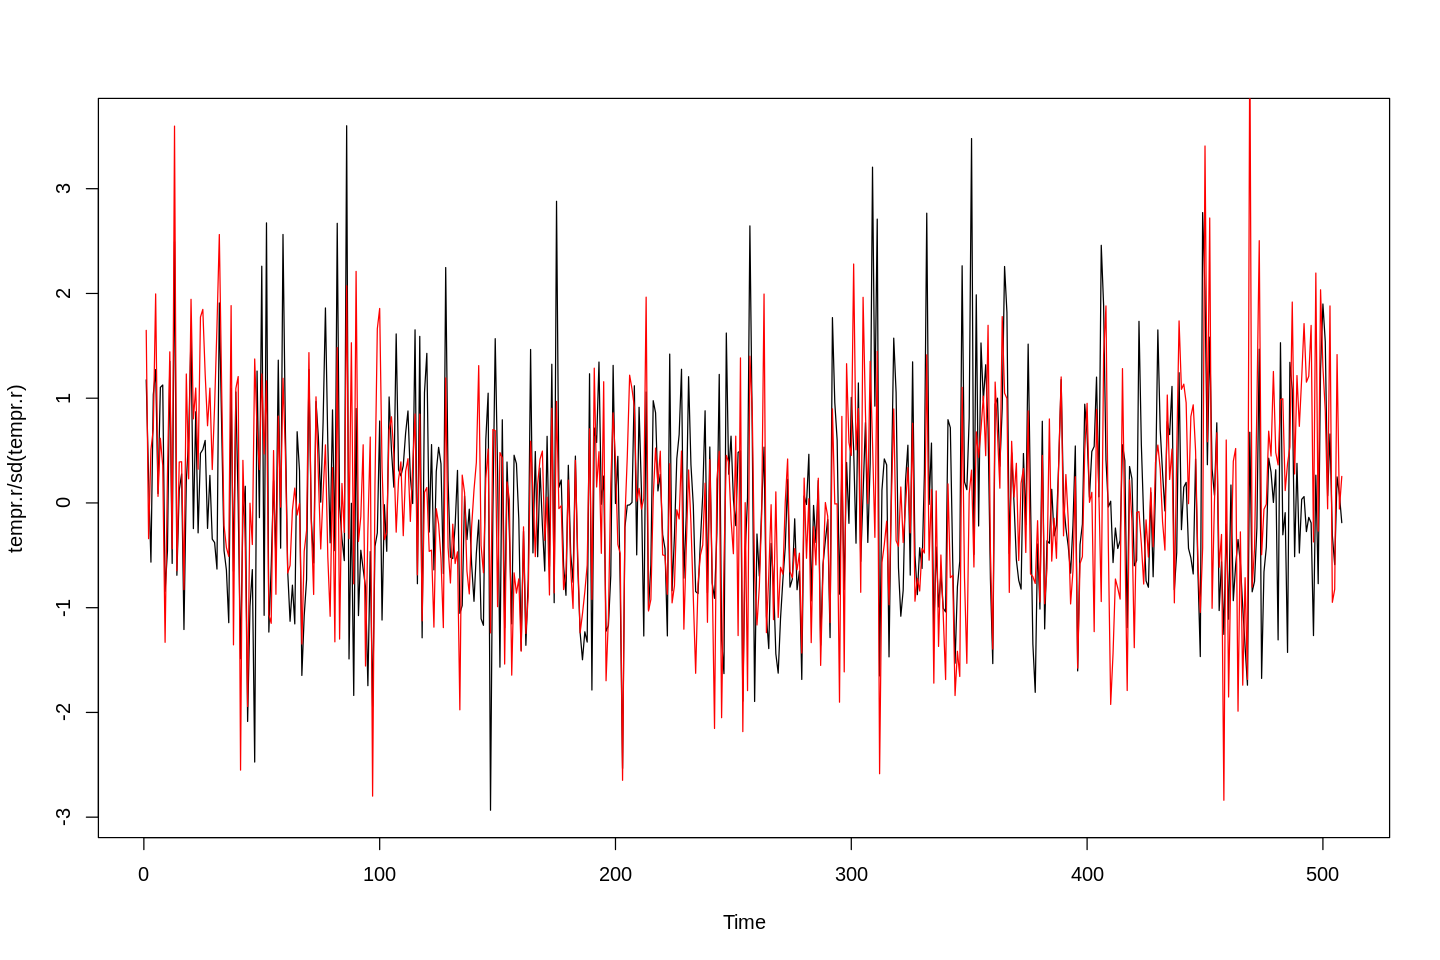

In [22]:
## Temperature and particulates
plot(tempr.r/sd(tempr.r))
lines(part.r/sd(part.r),col="red")

It's a bit hard to see if there is correlation just looking at the above plots. Let's try other tools

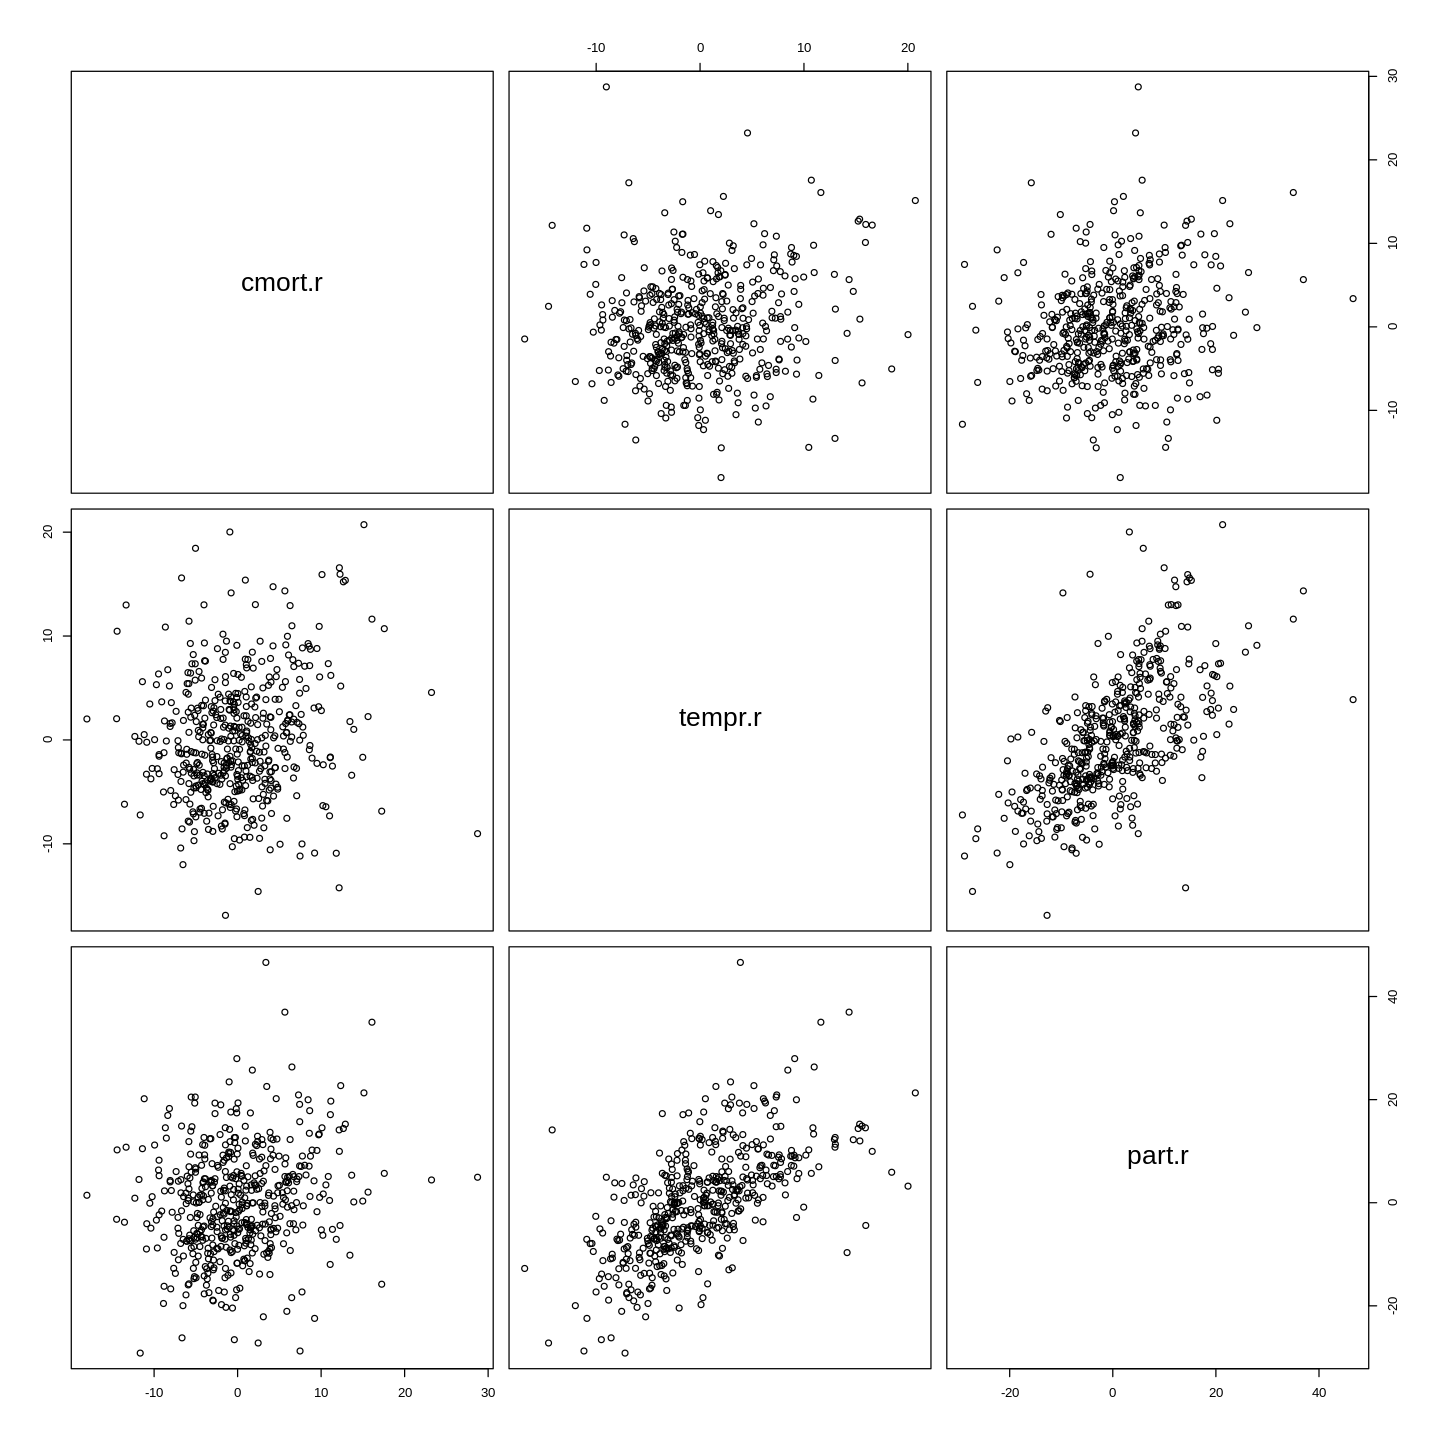

In [34]:
## Pairwise scatterplot
options(repr.plot.width = 12, repr.plot.height=12)
pairs(cbind(cmort.r,tempr.r,part.r))

In a scatterplot, we're looking for structure of any sort. If it's a line (positive or negative) that indicates linear dependence and would easily show up in correlation.  (If it's something more complicated, then the two time series are related but it can be harder to make use of that information... i.e., try some advanced techniques, which may work)

There's a very clear correlation between temperature and smog.  The correlation between mortality and temp  or smog is less clear

In [25]:
cor(tempr.r,part.r) # strong correlation
cor(cmort.r,part.r) # some correlation

[1] 0.6324632

[1] 0.1770856

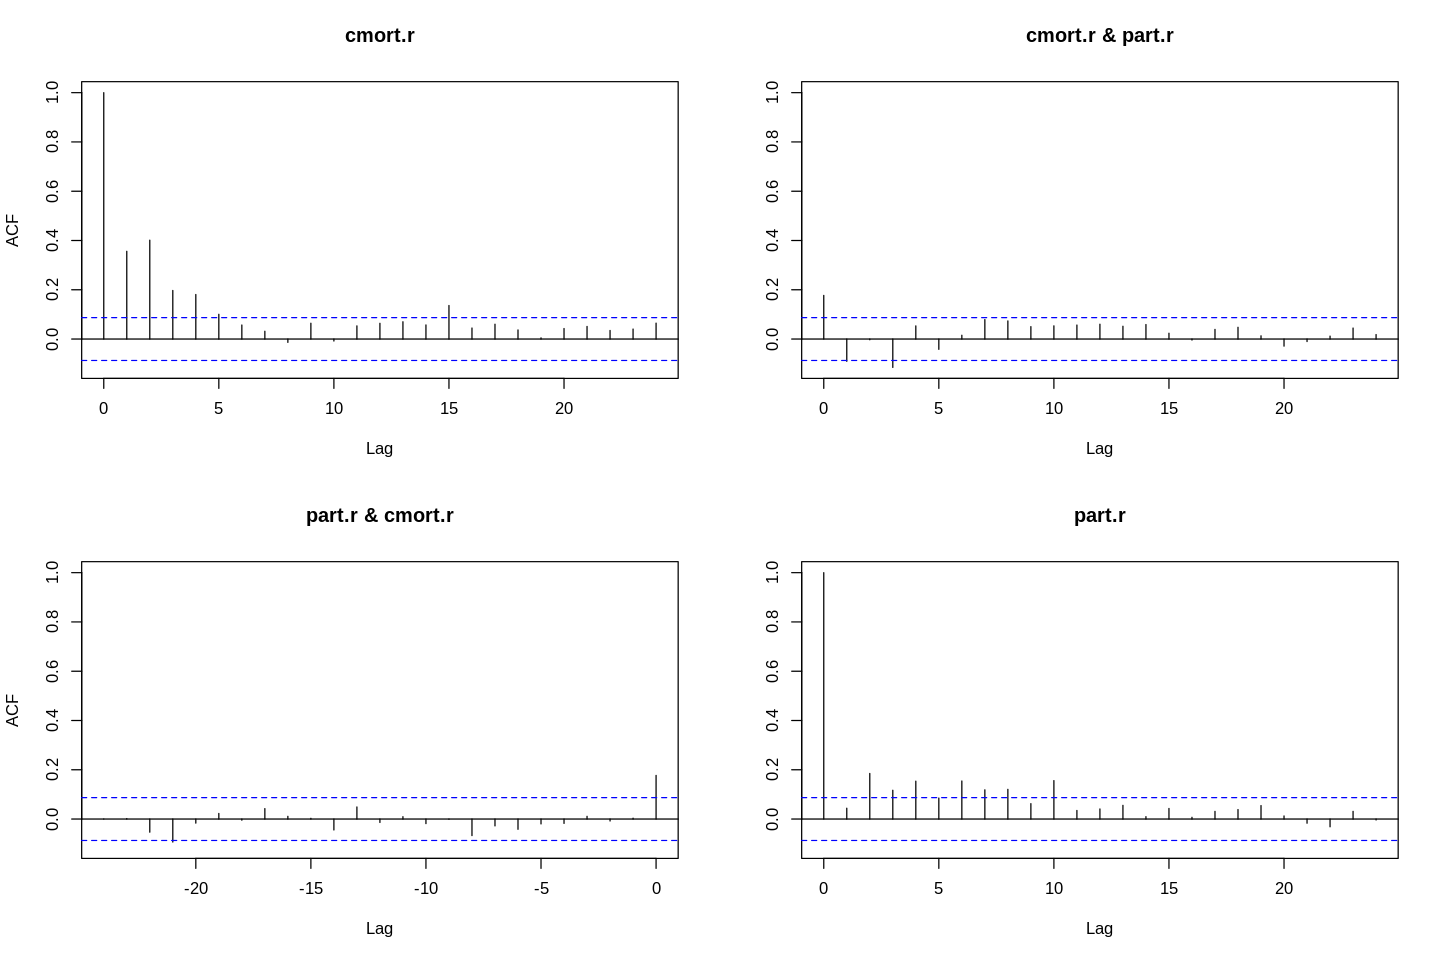

In [28]:
acf(cbind(cmort.r,part.r))

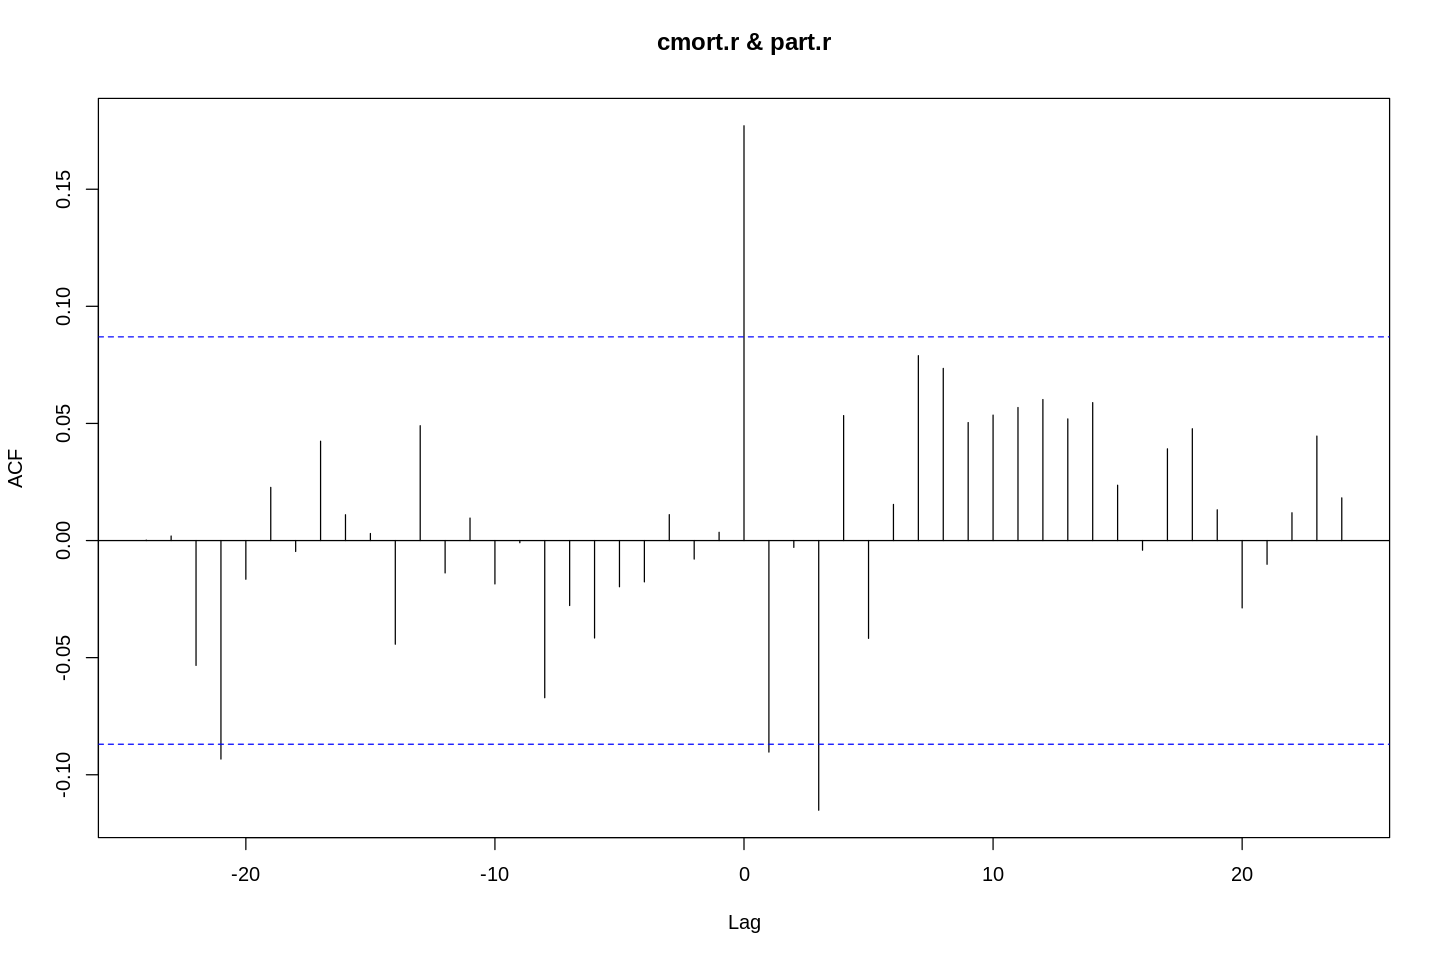

In [30]:
# Note that the above essentialy includes the CCF
ccf(cmort.r,part.r)

There's a slight correlation at lag 0, but otherwise there's very little correlation.  This means, using standard techniques, we don't expect knowing particulate matter in advanced to be useful for forecasting mortality rates (or at least only very slightly useful... it could be that it has a long-term effect, but this effect would likely be small compared to other effects, so it is not easy to see without a lot of data)

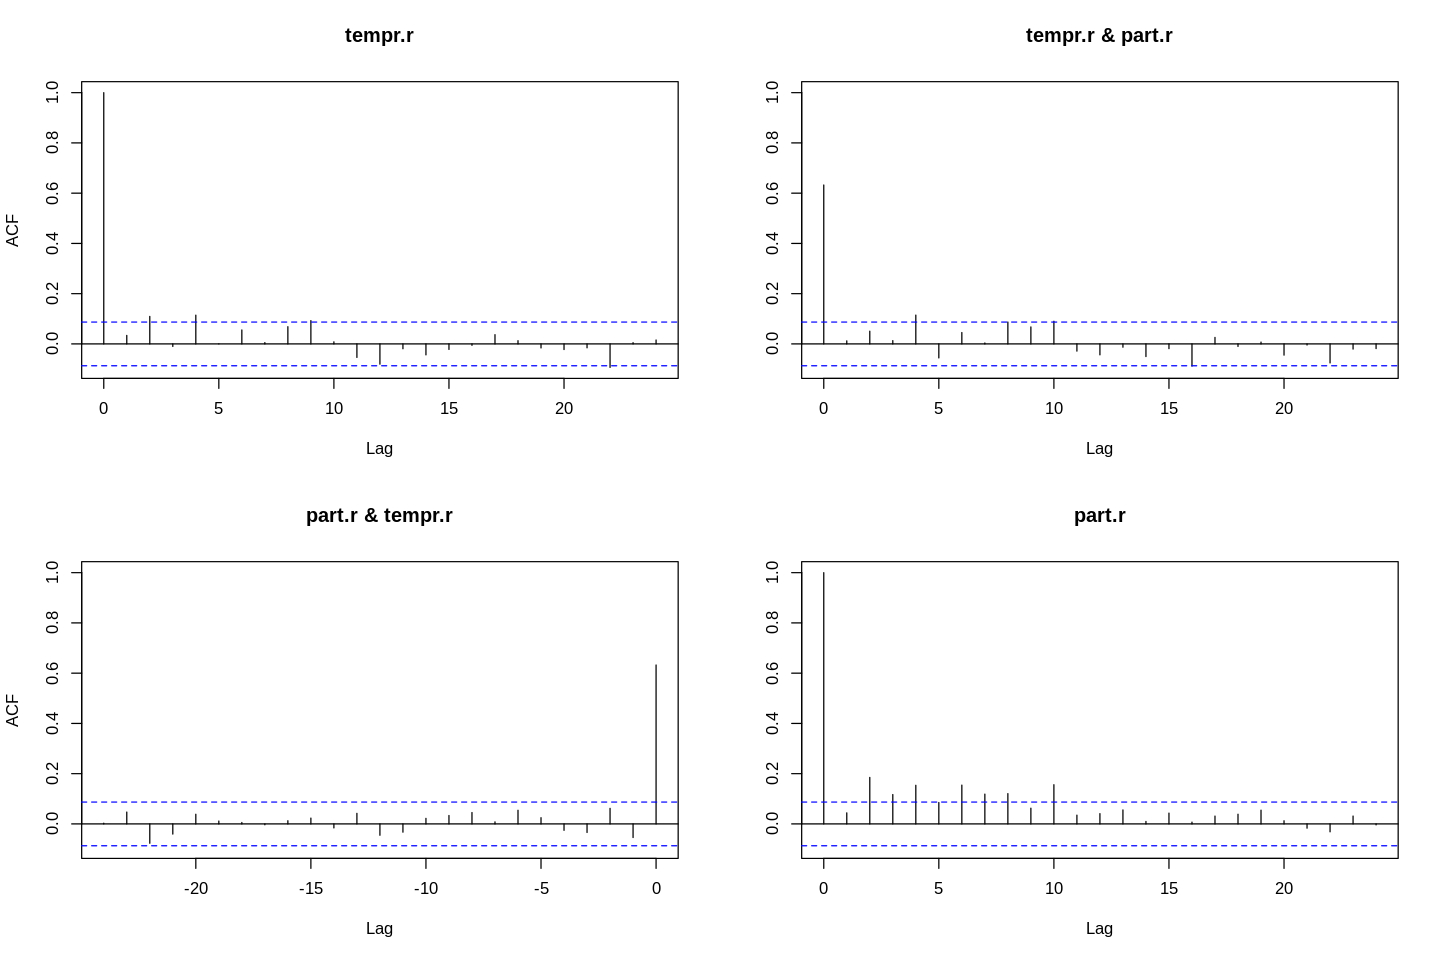

In [31]:
# What about temperature and smog?
acf(cbind(tempr.r,part.r))

Now we have a strong correlation at lag 0, but still very little correlation for other lags.  Temperature yesterday doesn't correlate well with smog today (beyond the fact that temperature yesterday does correlate with temperature today)